In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Thiết lập kích thước mặc định cho đồ thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Đọc dữ liệu
# Kiểm tra header của file để xác định có header sẵn hay không
# Nếu file không có header, sử dụng header=None và đặt tên cột sau
df = pd.read_csv('global_air_pollution_dataset.csv', header=None)

# Đặt tên cột dựa trên dữ liệu mẫu đã cung cấp
df.columns = ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value', 
              'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category', 
              'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']

# Kiểm tra dữ liệu
print(f"Số lượng bản ghi (records): {df.shape[0]}")
print(f"Số lượng thuộc tính (fields): {df.shape[1]}")
print("\nXem 5 dòng đầu tiên của dữ liệu:")
df.head()

Số lượng bản ghi (records): 23464
Số lượng thuộc tính (fields): 12

Xem 5 dòng đầu tiên của dữ liệu:


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good


In [2]:
# Thông tin cơ bản về bộ dữ liệu
print("Thông tin cấu trúc dữ liệu:")
df.info()

# Thống kê về phạm vi địa lý
print(f"\nSố lượng quốc gia: {df['Country'].nunique()}")
print(f"Số lượng thành phố: {df['City'].nunique()}")

# Top 10 quốc gia có nhiều thành phố nhất trong dữ liệu
country_counts = df['Country'].value_counts().head(10)
print("\nTop 10 quốc gia có nhiều thành phố nhất trong dữ liệu:")
print(country_counts)

# Phân bố mức độ ô nhiễm
aqi_category_counts = df['AQI Category'].value_counts()
print("\nPhân bố mức độ ô nhiễm:")
print(aqi_category_counts)

# Thống kê mô tả cho các biến số
print("\nThống kê mô tả cho các thuộc tính số:")
print(df.describe())

Thông tin cấu trúc dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23464 entries, 0 to 23463
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23037 non-null  object
 1   City                23463 non-null  object
 2   AQI Value           23464 non-null  object
 3   AQI Category        23464 non-null  object
 4   CO AQI Value        23464 non-null  object
 5   CO AQI Category     23464 non-null  object
 6   Ozone AQI Value     23464 non-null  object
 7   Ozone AQI Category  23464 non-null  object
 8   NO2 AQI Value       23464 non-null  object
 9   NO2 AQI Category    23464 non-null  object
 10  PM2.5 AQI Value     23464 non-null  object
 11  PM2.5 AQI Category  23464 non-null  object
dtypes: object(12)
memory usage: 2.1+ MB

Số lượng quốc gia: 176
Số lượng thành phố: 23463

Top 10 quốc gia có nhiều thành phố nhất trong dữ liệu:
Country
United States of America    2872
Ind

In [3]:
# Phân tích chi tiết từng thuộc tính
for column in df.columns:
    print(f"\n{'='*50}")
    print(f"Phân tích thuộc tính: {column}")
    print(f"{'='*50}")
    print(f"Kiểu dữ liệu: {df[column].dtype}")
    print(f"Số giá trị null: {df[column].isnull().sum()}")
    print(f"Số giá trị unique: {df[column].nunique()}")
    
    # Nếu là thuộc tính phân loại
    if df[column].dtype == 'object':
        # Hiển thị chi tiết cho các thuộc tính phân loại có ít giá trị unique hoặc các thuộc tính AQI Category
        if df[column].nunique() <= 10 or 'Category' in column:
            value_counts = df[column].value_counts(normalize=True) * 100
            print("\nTỷ lệ phần trăm của từng giá trị:")
            for val, pct in value_counts.items():
                print(f"  {val}: {pct:.2f}%")
            print(f"\nMode: {df[column].mode().values[0]}")
    
    # Nếu là thuộc tính số
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_val = df[column].mean()
        median_val = df[column].median()
        min_val = df[column].min()
        max_val = df[column].max()
        midrange = (min_val + max_val) / 2
        mode_val = df[column].mode().values[0]
        q1, q3 = df[column].quantile([0.25, 0.75])
        
        print(f"\nMean: {mean_val:.2f}")
        print(f"Median: {median_val:.2f}")
        print(f"Midrange: {midrange:.2f}")
        print(f"Mode: {mode_val}")
        print(f"Min: {min_val}")
        print(f"Max: {max_val}")
        print(f"Five-number summary: Min={min_val}, Q1={q1}, Median={median_val}, Q3={q3}, Max={max_val}")


Phân tích thuộc tính: Country
Kiểu dữ liệu: object
Số giá trị null: 427
Số giá trị unique: 176

Phân tích thuộc tính: City
Kiểu dữ liệu: object
Số giá trị null: 1
Số giá trị unique: 23463

Phân tích thuộc tính: AQI Value
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 348

Phân tích thuộc tính: AQI Category
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 7

Tỷ lệ phần trăm của từng giá trị:
  Good: 42.35%
  Moderate: 39.34%
  Unhealthy: 9.49%
  Unhealthy for Sensitive Groups: 6.78%
  Very Unhealthy: 1.22%
  Hazardous: 0.81%
  AQI Category: 0.00%

Mode: Good

Phân tích thuộc tính: CO AQI Value
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 35

Phân tích thuộc tính: CO AQI Category
Kiểu dữ liệu: object
Số giá trị null: 0
Số giá trị unique: 4

Tỷ lệ phần trăm của từng giá trị:
  Good: 99.98%
  Moderate: 0.01%
  CO AQI Category: 0.00%
  Unhealthy for Sensitive Groups: 0.00%

Mode: Good

Phân tích thuộc tính: Ozone AQI Value
Kiểu dữ liệu: object
Số giá trị

In [4]:
# Tạo bản sao của dữ liệu để tiền xử lý
df_clean = df.copy()

# Kiểm tra missing values
missing_values = df_clean.isnull().sum()
print("Missing values trong mỗi cột:")
print(missing_values)

# Kiểm tra duplicate
duplicates = df_clean.duplicated().sum()
print(f"\nSố bản ghi trùng lặp: {duplicates}")

# Đảm bảo các cột số có kiểu dữ liệu số
numeric_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Kiểm tra và xử lý outliers
print("\nKiểm tra outliers cho các cột số:")
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
    print(f"Số lượng outliers trong {col}: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")

# Xử lý outliers (nếu cần)
# Có thể lựa chọn một trong các phương pháp:
# 1. Giữ nguyên outliers để giữ tính nguyên bản của dữ liệu
# 2. Gán outliers bằng giới hạn trên/dưới
# 3. Loại bỏ outliers

# Ví dụ phương pháp 2 (gán giới hạn):
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Thay thế outliers bằng giới hạn
    df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
    df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound

print("\nSau khi xử lý outliers, thống kê mô tả mới:")
print(df_clean[numeric_cols].describe())

# Tạo các biến mới có ích cho phân tích
# Ví dụ: Tạo biến nhị phân từ AQI Category
df_clean['Is_Unhealthy'] = df_clean['AQI Category'].apply(lambda x: 1 if 'Unhealthy' in x else 0)

# Tạo biến thứ tự từ AQI Category
aqi_order = {
    'Good': 1, 
    'Moderate': 2, 
    'Unhealthy for Sensitive Groups': 3, 
    'Unhealthy': 4, 
    'Very Unhealthy': 5, 
    'Hazardous': 6
}
df_clean['AQI_Ordinal'] = df_clean['AQI Category'].map(aqi_order)

print("\nDữ liệu sau khi tiền xử lý và thêm biến mới:")
print(df_clean.head())

Missing values trong mỗi cột:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

Số bản ghi trùng lặp: 0

Kiểm tra outliers cho các cột số:
Số lượng outliers trong AQI Value: 2935 (12.51%)
Số lượng outliers trong CO AQI Value: 8596 (36.63%)
Số lượng outliers trong Ozone AQI Value: 1513 (6.45%)
Số lượng outliers trong NO2 AQI Value: 1681 (7.16%)
Số lượng outliers trong PM2.5 AQI Value: 2641 (11.26%)

Sau khi xử lý outliers, thống kê mô tả mới:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  23463.000000       23463.0     23463.000000   23463.000000   
mean      65.780207           1.0        31.677641       2.473980   
std       35.868826           0.0        15.816873       3.090237   
mi

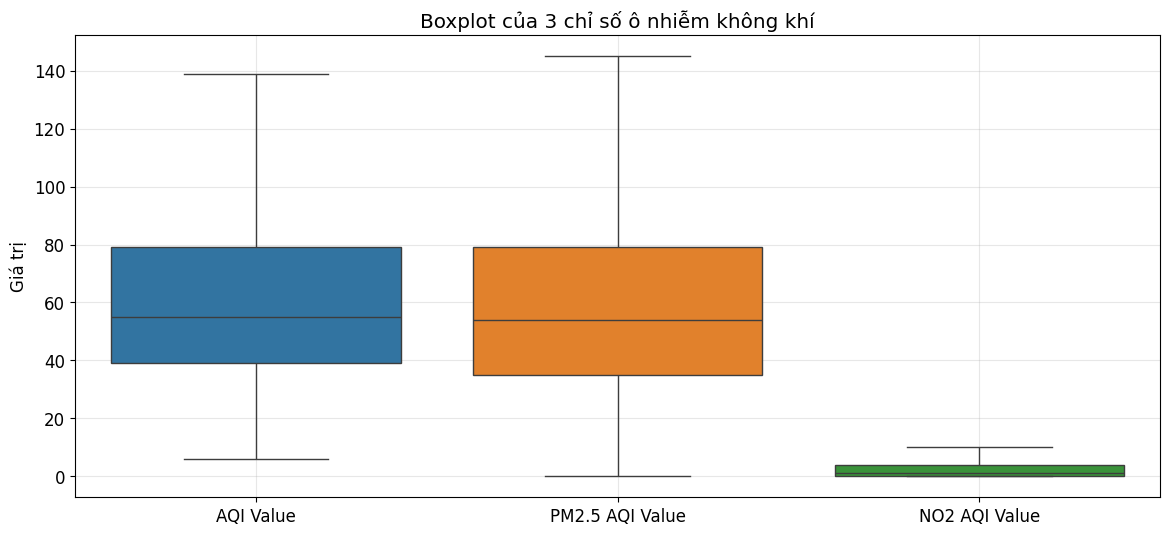

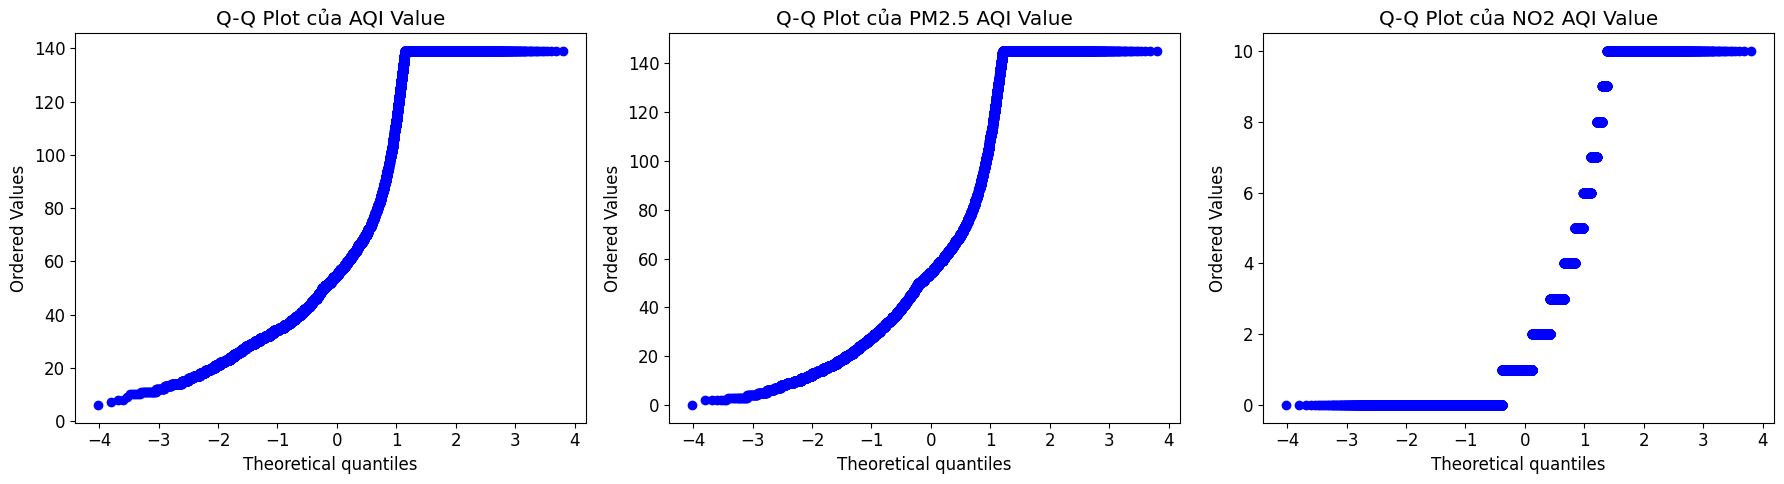

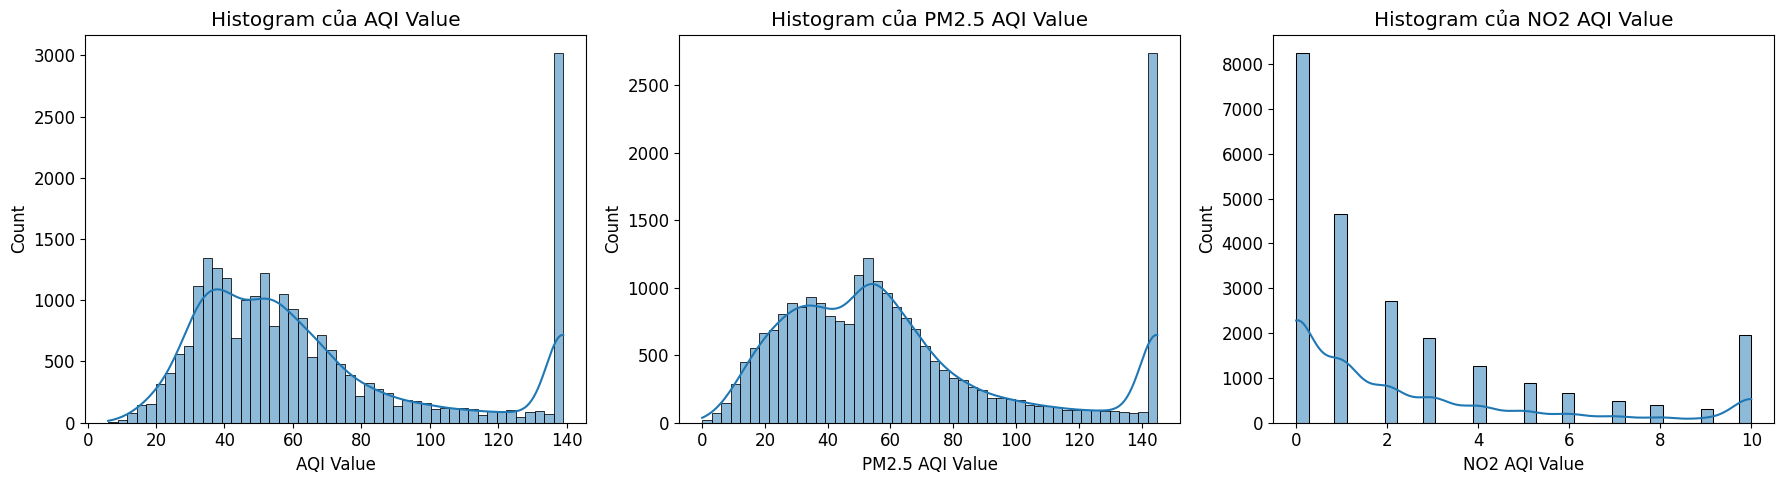

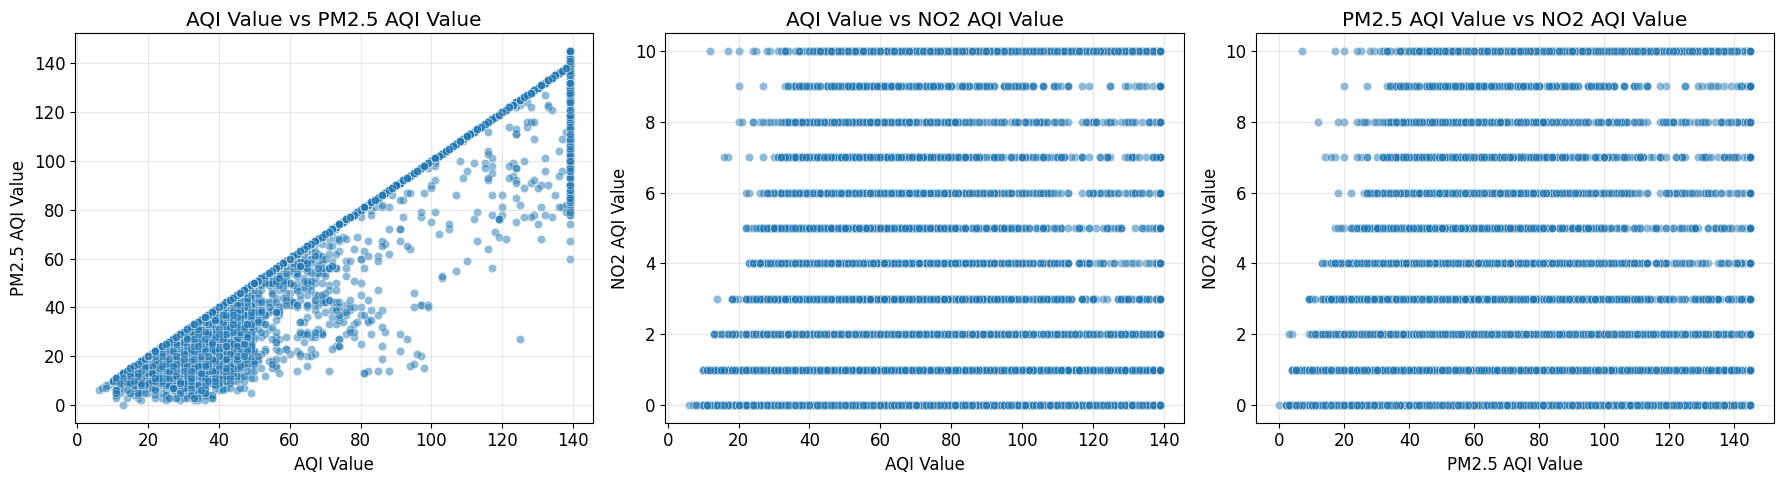

In [5]:
# Chọn 3 thuộc tính số cho phân tích
selected_features = ['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value']

# 1. Boxplot dựa trên five-number summary
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean[selected_features])
plt.title('Boxplot của 3 chỉ số ô nhiễm không khí')
plt.ylabel('Giá trị')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Quantile-Quantile Plot cho từng cặp thuộc tính
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Q-Q plot cho AQI Value
stats.probplot(df_clean['AQI Value'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot của AQI Value')

# Q-Q plot cho PM2.5 AQI Value
stats.probplot(df_clean['PM2.5 AQI Value'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot của PM2.5 AQI Value')

# Q-Q plot cho NO2 AQI Value
stats.probplot(df_clean['NO2 AQI Value'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot của NO2 AQI Value')

plt.tight_layout()
plt.show()

# 3. Histogram cho từng cặp thuộc tính
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram cho AQI Value
sns.histplot(df_clean['AQI Value'], kde=True, ax=axes[0])
axes[0].set_title('Histogram của AQI Value')

# Histogram cho PM2.5 AQI Value
sns.histplot(df_clean['PM2.5 AQI Value'], kde=True, ax=axes[1])
axes[1].set_title('Histogram của PM2.5 AQI Value')

# Histogram cho NO2 AQI Value
sns.histplot(df_clean['NO2 AQI Value'], kde=True, ax=axes[2])
axes[2].set_title('Histogram của NO2 AQI Value')

plt.tight_layout()
plt.show()

# 4. Scatter plots cho từng cặp thuộc tính
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot giữa AQI Value và PM2.5 AQI Value
sns.scatterplot(x='AQI Value', y='PM2.5 AQI Value', data=df_clean, alpha=0.5, ax=axes[0])
axes[0].set_title('AQI Value vs PM2.5 AQI Value')
axes[0].grid(True, alpha=0.3)

# Scatter plot giữa AQI Value và NO2 AQI Value
sns.scatterplot(x='AQI Value', y='NO2 AQI Value', data=df_clean, alpha=0.5, ax=axes[1])
axes[1].set_title('AQI Value vs NO2 AQI Value')
axes[1].grid(True, alpha=0.3)

# Scatter plot giữa PM2.5 AQI Value và NO2 AQI Value
sns.scatterplot(x='PM2.5 AQI Value', y='NO2 AQI Value', data=df_clean, alpha=0.5, ax=axes[2])
axes[2].set_title('PM2.5 AQI Value vs NO2 AQI Value')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

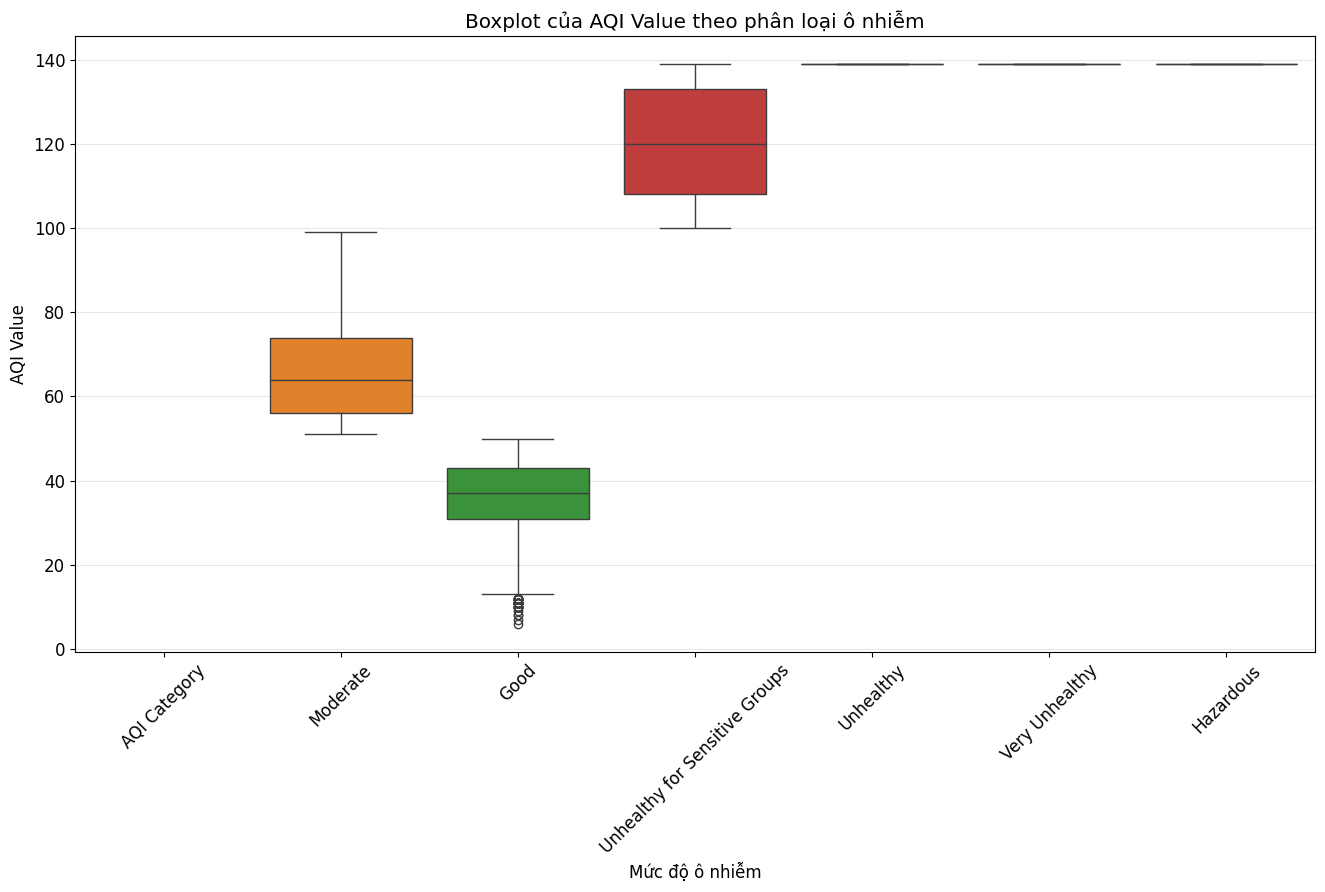

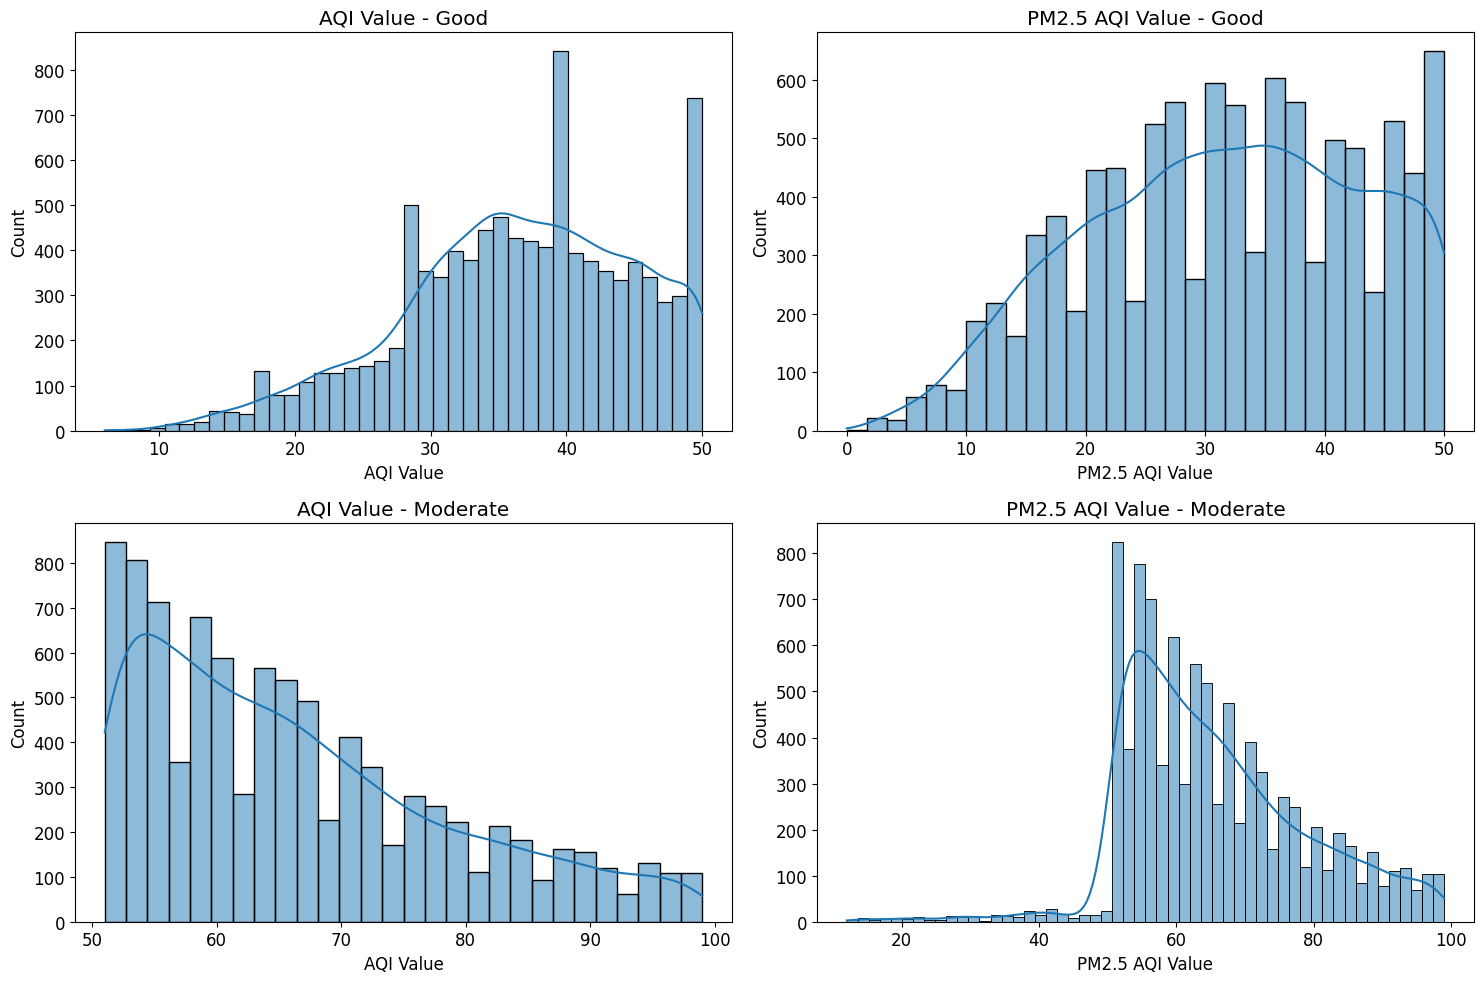

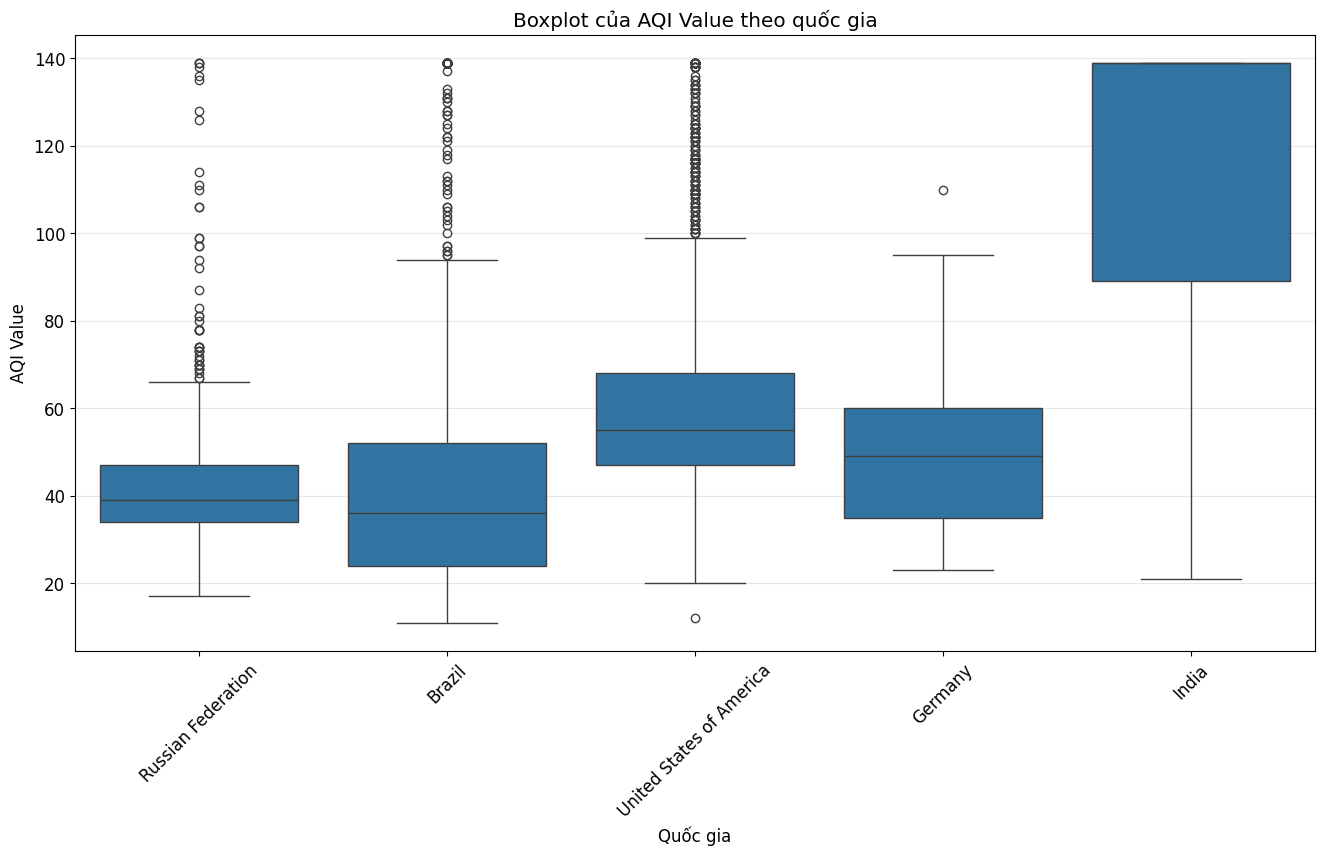

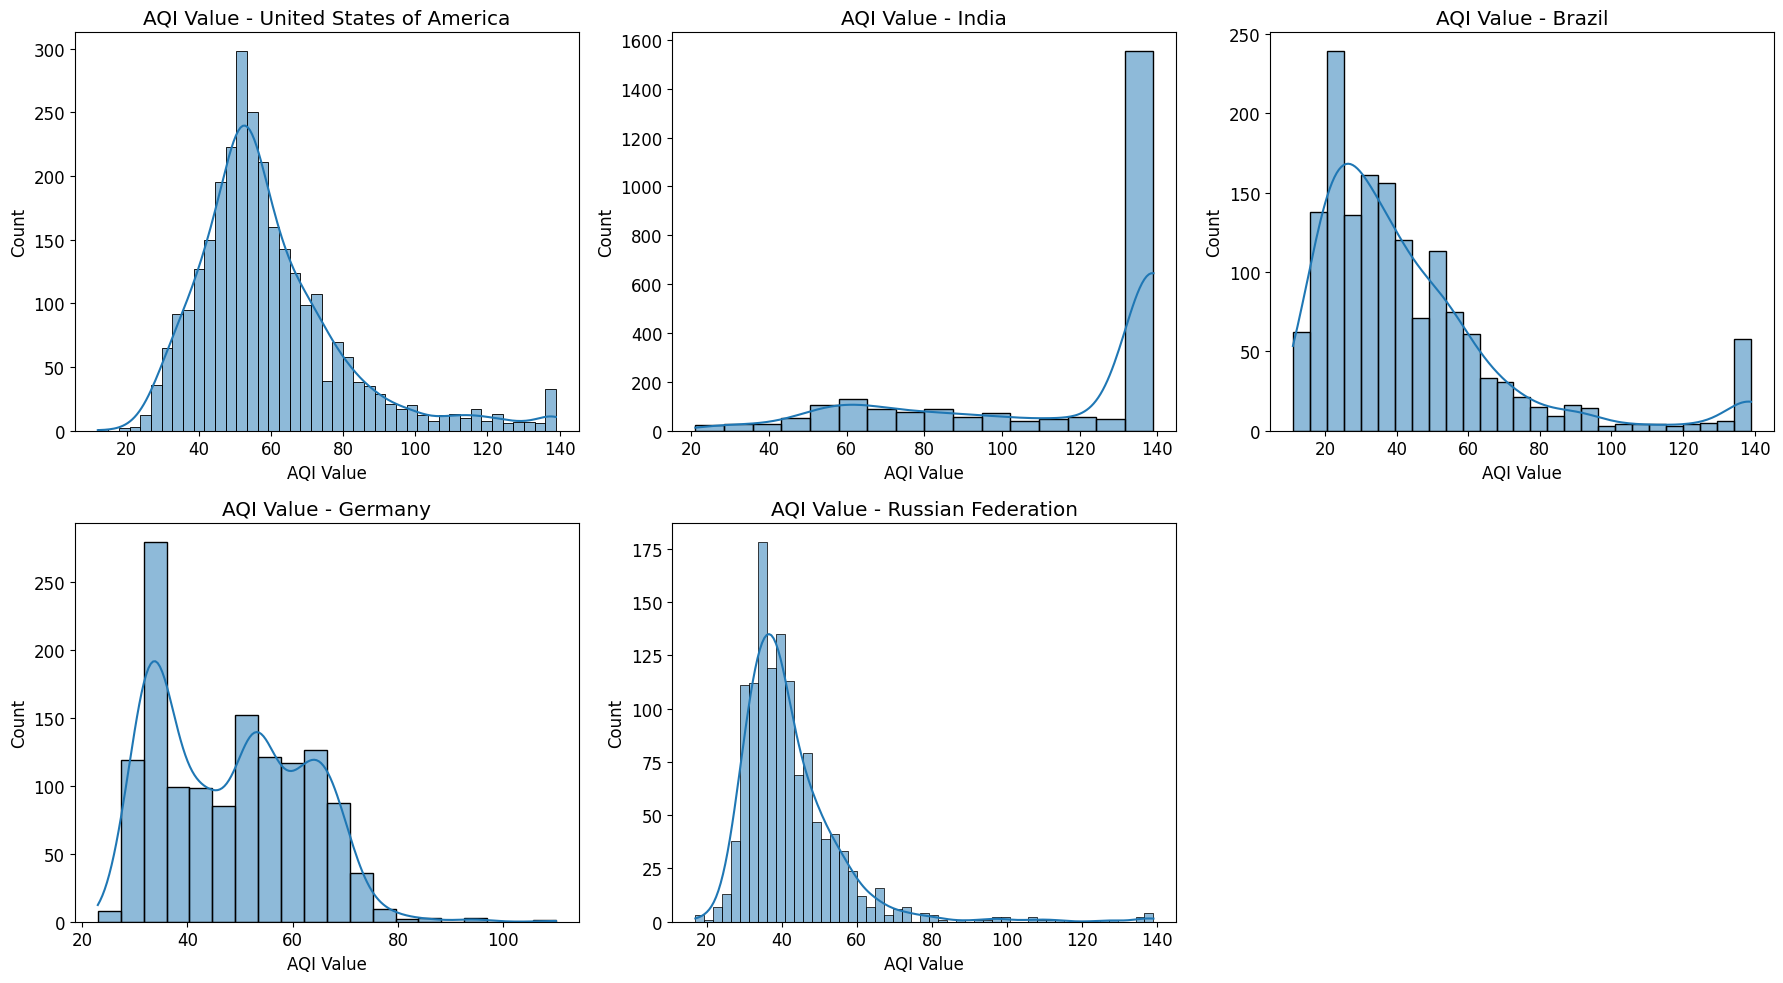

In [6]:
# Nhóm dữ liệu theo AQI Category
# 1. Boxplot theo nhóm
plt.figure(figsize=(16, 8))
sns.boxplot(x='AQI Category', y='AQI Value', data=df_clean, hue='AQI Category', legend=False)
plt.title('Boxplot của AQI Value theo phân loại ô nhiễm')
plt.xlabel('Mức độ ô nhiễm')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# 2. Histograms theo nhóm cho 2 thuộc tính
# Lựa chọn 2 mức độ ô nhiễm phổ biến nhất
top_categories = df_clean['AQI Category'].value_counts().nlargest(2).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, category in enumerate(top_categories):
    subset = df_clean[df_clean['AQI Category'] == category]
    
    # Histogram cho AQI Value
    sns.histplot(subset['AQI Value'], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'AQI Value - {category}')
    
    # Histogram cho PM2.5 AQI Value
    sns.histplot(subset['PM2.5 AQI Value'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'PM2.5 AQI Value - {category}')

plt.tight_layout()
plt.show()

# Nhóm dữ liệu theo Country
# Chọn 5 quốc gia có số lượng mẫu nhiều nhất
top_countries = df_clean['Country'].value_counts().nlargest(5).index.tolist()
country_data = df_clean[df_clean['Country'].isin(top_countries)]

# Boxplot theo quốc gia
plt.figure(figsize=(16, 8))
sns.boxplot(x='Country', y='AQI Value', data=country_data)
plt.title('Boxplot của AQI Value theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Histogram theo quốc gia
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, country in enumerate(top_countries[:5]):
    subset = df_clean[df_clean['Country'] == country]
    sns.histplot(subset['AQI Value'], kde=True, ax=axes[i])
    axes[i].set_title(f'AQI Value - {country}')

# Ẩn subplot cuối cùng nếu chỉ có 5 quốc gia
if len(top_countries) < 6:
    axes[5].set_visible(False)

plt.tight_layout()
plt.show()


Kiểm tra giá trị NaN trong 4 dòng dữ liệu đầu tiên:
AQI Value          1
CO AQI Value       1
Ozone AQI Value    1
NO2 AQI Value      1
PM2.5 AQI Value    1
AQI_Ordinal        1
Is_Unhealthy       0
dtype: int64

Số dòng dữ liệu sau khi loại bỏ NaN: 3
Đã thêm 1 dòng dữ liệu để có đủ 4 dòng

Dữ liệu sau khi điền giá trị NaN:
   AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
0  65.780207           1.0        31.677641        2.47398        63.686016   
1  51.000000           1.0        36.000000        0.00000        51.000000   
2  41.000000           1.0         5.000000        1.00000        41.000000   
3  66.000000           1.0        39.000000        2.00000        66.000000   

   AQI_Ordinal  Is_Unhealthy  
0     1.903422             0  
1     2.000000             0  
2     1.000000             0  
3     2.000000             0  

Độ đo Cosin giữa 4 dòng dữ liệu:
          Record 1  Record 2  Record 3  Record 4
Record 1  1.000000  0.991136  0.969479 

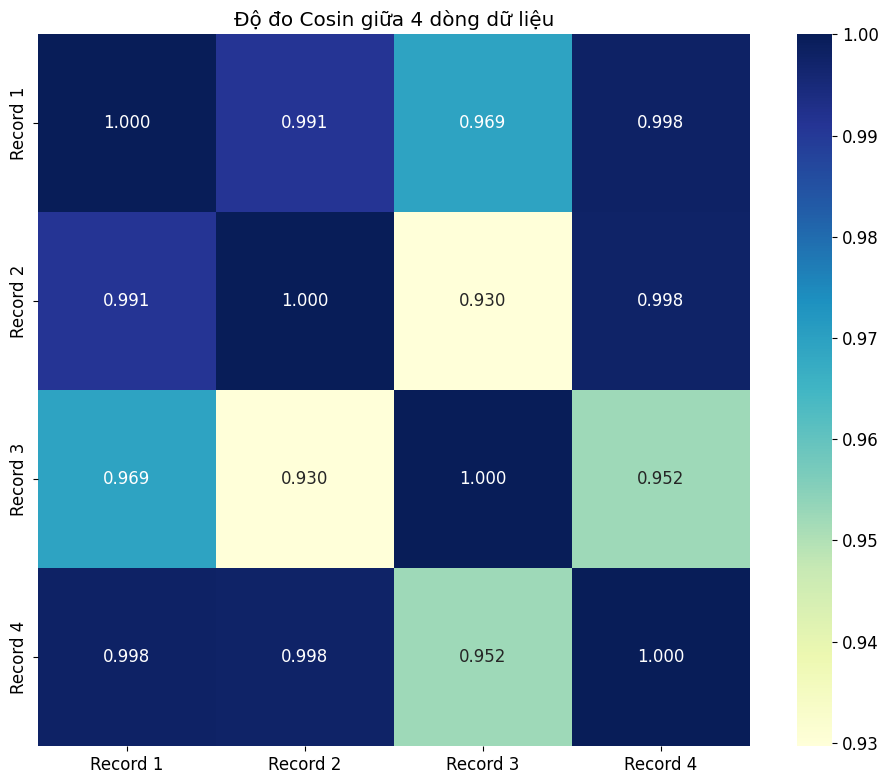

In [13]:
# Trước khi tính độ đo cosin, hãy kiểm tra và xử lý giá trị NaN trong dữ liệu

# Kiểm tra xem có giá trị NaN trong sample_data không
print("\nKiểm tra giá trị NaN trong 4 dòng dữ liệu đầu tiên:")
print(sample_data[numeric_attributes].isnull().sum())

# Phương pháp 1: Loại bỏ dòng có giá trị NaN
sample_data_clean = sample_data.dropna(subset=numeric_attributes)
print(f"\nSố dòng dữ liệu sau khi loại bỏ NaN: {len(sample_data_clean)}")

# Nếu không đủ 4 dòng, bạn có thể chọn thêm dòng từ dữ liệu gốc
if len(sample_data_clean) < 4:
    # Tìm thêm dòng không có NaN từ dữ liệu gốc
    additional_rows = df_clean.dropna(subset=numeric_attributes).iloc[4:8-len(sample_data_clean)]
    sample_data_clean = pd.concat([sample_data_clean, additional_rows])
    print(f"Đã thêm {len(additional_rows)} dòng dữ liệu để có đủ 4 dòng")

# Phương pháp 2: Điền các giá trị NaN bằng giá trị trung bình
sample_data_filled = sample_data.copy()
for col in numeric_attributes:
    sample_data_filled[col] = sample_data_filled[col].fillna(df_clean[col].mean())

print("\nDữ liệu sau khi điền giá trị NaN:")
print(sample_data_filled[numeric_attributes])

# Bây giờ hãy sử dụng dữ liệu đã được xử lý để tính độ đo cosin
# Sử dụng phương pháp 2 (điền NaN)
sample_numeric = sample_data_filled[numeric_attributes].values

# Tính độ đo cosin
cosine_sim = cosine_similarity(sample_numeric)

# Tạo DataFrame để hiển thị kết quả rõ ràng
cosine_df = pd.DataFrame(
    cosine_sim,
    index=[f"Record {i+1}" for i in range(len(sample_data_filled))],
    columns=[f"Record {i+1}" for i in range(len(sample_data_filled))]
)

print("\nĐộ đo Cosin giữa 4 dòng dữ liệu:")
print(cosine_df)

# Vẽ heatmap cho độ đo cosin
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_df, annot=True, fmt='.3f', cmap='YlGnBu', square=True)
plt.title('Độ đo Cosin giữa 4 dòng dữ liệu')
plt.tight_layout()
plt.show()

Dữ liệu sau khi chuẩn hóa:
          AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
count  2.346400e+04       23464.0     2.346400e+04   2.346400e+04   
mean  -1.895669e-16           0.0     5.935321e-17  -7.237458e-17   
std    1.000021e+00           0.0     1.000021e+00   1.000021e+00   
min   -1.666705e+00           0.0    -2.002861e+00  -8.006136e-01   
25%   -7.466469e-01           0.0    -6.751079e-01  -8.006136e-01   
50%   -3.005581e-01           0.0    -4.284477e-02  -4.770001e-01   
75%    3.685751e-01           0.0     5.261921e-01   4.938407e-01   
max    2.041408e+00           0.0     2.328142e+00   2.435522e+00   

       PM2.5 AQI Value  
count     2.346400e+04  
mean     -3.391612e-17  
std       1.000021e+00  
min      -1.631501e+00  
25%      -7.348752e-01  
50%      -2.481353e-01  
75%       3.923119e-01  
max       2.083093e+00  

Mã hóa cho AQI Category:
AQI Category: 0
Good: 1
Hazardous: 2
Moderate: 3
Unhealthy: 4
Unhealthy for Sensitive Groups: 5
Very

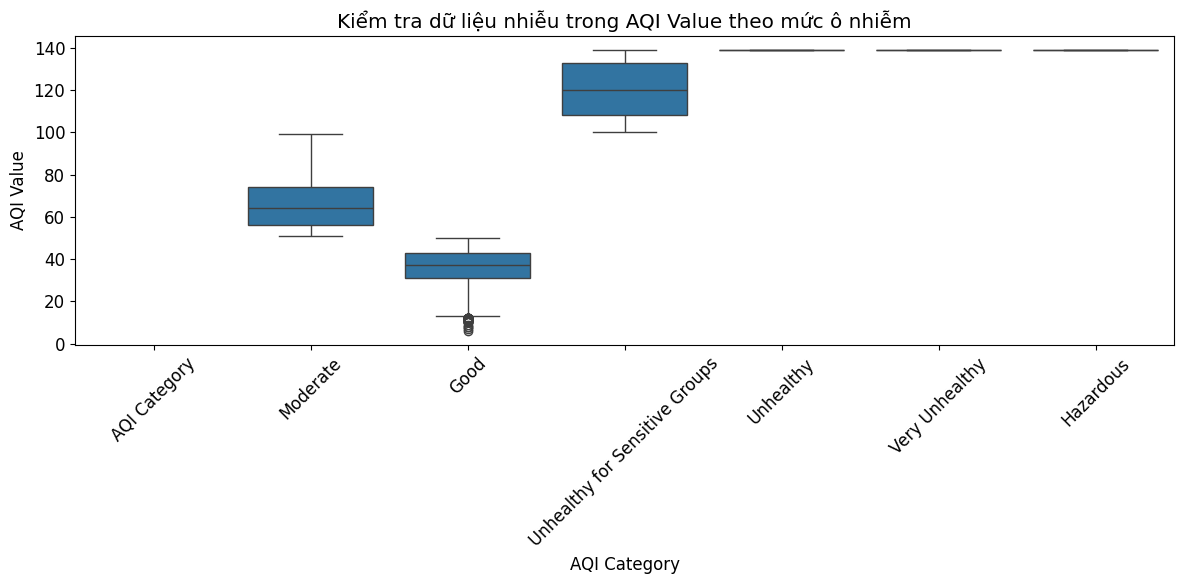


Số lượng bản ghi không nhất quán: 191
Một số bản ghi không nhất quán:
          Country          City  AQI Value AQI Category  CO AQI Value  \
181         India    Govindgarh      139.0    Hazardous           1.0   
277      Pakistan  Bahawalnagar      139.0    Hazardous           1.0   
278  South Africa       Balfour      139.0    Hazardous           1.0   
418         India      Phillaur      139.0    Hazardous           1.0   
440         India         Salon      139.0    Hazardous           1.0   

    CO AQI Category  Ozone AQI Value              Ozone AQI Category  \
181            Good             45.0                            Good   
277            Good             38.0                            Good   
278            Good              1.0                            Good   
418            Good             68.5  Unhealthy for Sensitive Groups   
440            Good             48.0                            Good   

     NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.

In [14]:

# 1. Chuẩn hóa các thuộc tính số
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Tạo bản sao mới của dữ liệu sạch
df_processed = df_clean.copy()

# Kiểm tra và xử lý NaN trước khi chuẩn hóa
numeric_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 
                   'NO2 AQI Value', 'PM2.5 AQI Value']

# Điền giá trị NaN bằng giá trị trung bình của mỗi cột
for col in numeric_columns:
    df_processed[col] = df_processed[col].fillna(df_processed[col].mean())

# Chuẩn hóa các thuộc tính số
scaler = StandardScaler()
df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

print("Dữ liệu sau khi chuẩn hóa:")
print(df_processed[numeric_columns].describe())

# 2. Mã hóa thuộc tính phân loại
# Label Encoding cho thuộc tính có thứ tự 'AQI Category'
label_encoder = LabelEncoder()
df_processed['AQI_Category_Encoded'] = label_encoder.fit_transform(df_processed['AQI Category'])
print("\nMã hóa cho AQI Category:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

# One-Hot Encoding cho thuộc tính danh nghĩa 'Country'
# Chỉ lấy top 20 quốc gia phổ biến nhất để tránh quá nhiều cột
top_countries = df_processed['Country'].value_counts().nlargest(20).index
df_processed['Country_Top20'] = df_processed['Country'].apply(lambda x: x if x in top_countries else 'Other')

# Sử dụng pandas get_dummies
country_dummies = pd.get_dummies(df_processed['Country_Top20'], prefix='Country')
df_processed = pd.concat([df_processed, country_dummies], axis=1)

print(f"\nSau khi One-Hot Encoding, dữ liệu có {df_processed.shape[1]} cột")
print(df_processed.head())

# 3. Phát hiện và xử lý nhiễu
# Kiểm tra phân phối cho mỗi thuộc tính và phát hiện dữ liệu nhiễu
# Ví dụ với AQI Value

plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI Category', y='AQI Value', data=df_clean)
plt.title('Kiểm tra dữ liệu nhiễu trong AQI Value theo mức ô nhiễm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Lọc các giá trị ngoại lai rõ rệt (nếu cần)
# Ví dụ: Loại bỏ các AQI Value cực lớn không phù hợp với phân loại
inconsistent_data = df_clean[
    ((df_clean['AQI Category'] == 'Good') & (df_clean['AQI Value'] > 100)) |
    ((df_clean['AQI Category'] == 'Hazardous') & (df_clean['AQI Value'] < 200))
]

print(f"\nSố lượng bản ghi không nhất quán: {len(inconsistent_data)}")
if len(inconsistent_data) > 0:
    print("Một số bản ghi không nhất quán:")
    print(inconsistent_data.head())

Tổng hợp theo quốc gia (top 10 quốc gia có AQI cao nhất):
                      Count    Mean AQI  Median AQI  Min AQI  Max AQI  \
Country                                                                 
Kuwait                    3  139.000000       139.0    139.0    139.0   
Aruba                     1  139.000000       139.0    139.0    139.0   
Mauritania                4  139.000000       139.0    139.0    139.0   
Qatar                     2  139.000000       139.0    139.0    139.0   
United Arab Emirates      3  139.000000       139.0    139.0    139.0   
Republic of Korea         1  139.000000       139.0    139.0    139.0   
Bahrain                   1  139.000000       139.0    139.0    139.0   
Pakistan                307  135.765472       139.0     59.0    139.0   
Gambia                    9  134.555556       139.0    111.0    139.0   
Senegal                  33  132.060606       139.0     29.0    139.0   

                        Std AQI Most Common Category  
Country   

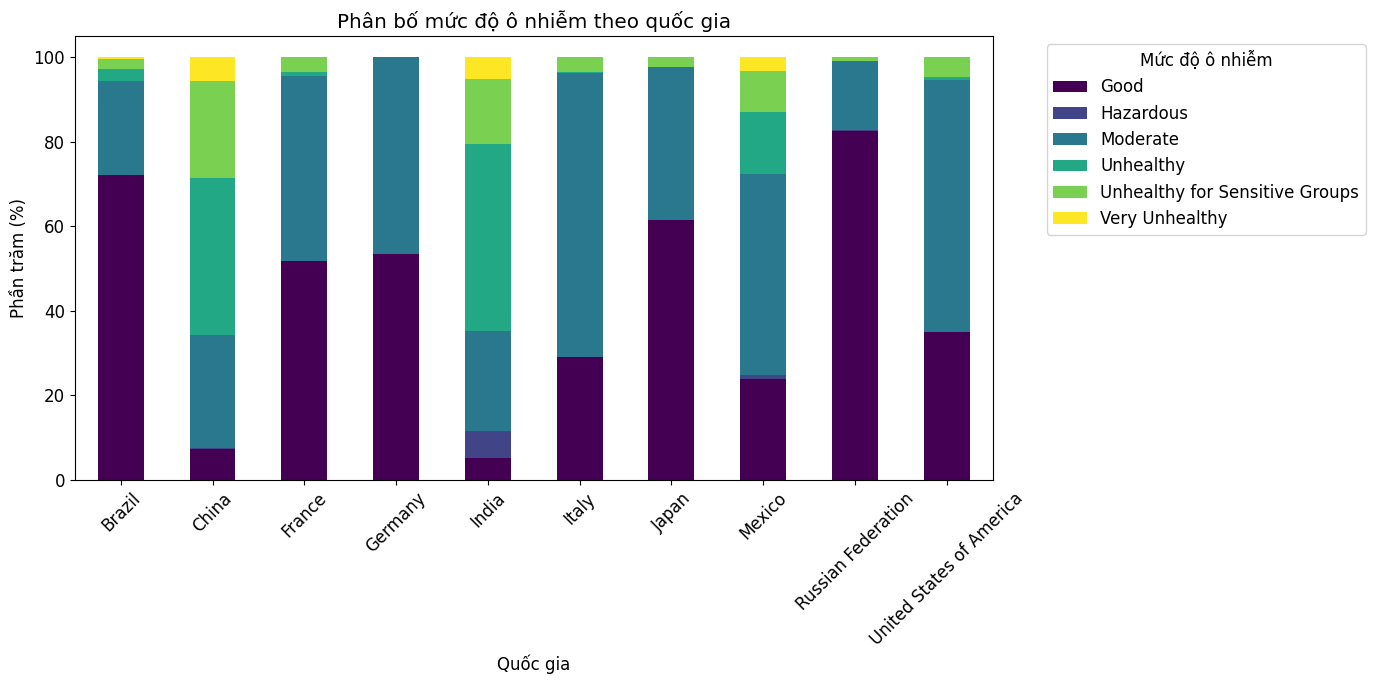


Chỉ số ô nhiễm tổng hợp theo quốc gia (top 15):
Country
Kuwait                  110.625000
United Arab Emirates    109.875000
Bahrain                 109.825000
Qatar                   109.450000
Pakistan                104.786564
Mauritania              103.375000
Aruba                   102.550000
Yemen                   100.650000
Republic of Korea       100.600000
Saudi Arabia             99.455357
Gambia                   99.288889
Oman                     98.862500
Senegal                  97.396970
Guinea-Bissau            91.825000
India                    88.550201
Name: Composite_Pollution_Index, dtype: float64


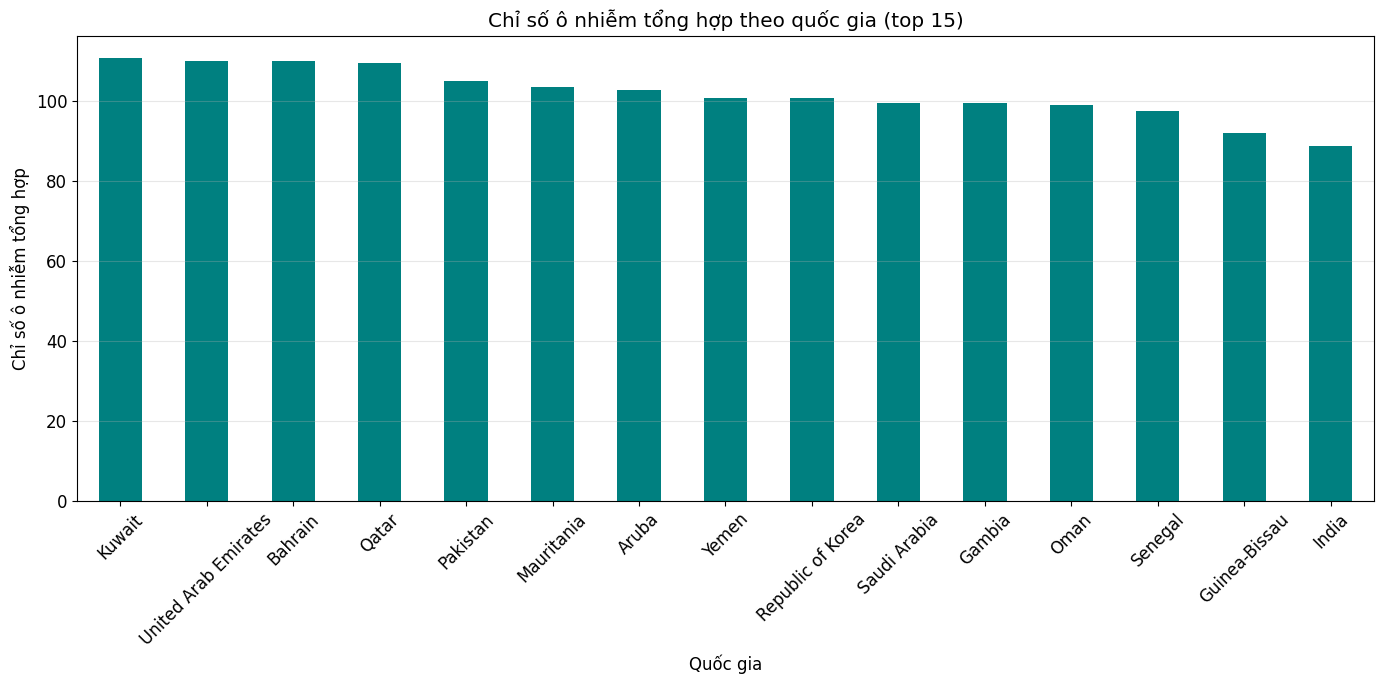

In [15]:
# 1. Tổng hợp theo quốc gia
# Đảm bảo không có NaN trước khi tổng hợp
df_for_summary = df_clean.copy()
for col in numeric_columns:
    df_for_summary[col] = df_for_summary[col].fillna(df_for_summary[col].median())

country_summary = df_for_summary.groupby('Country').agg({
    'AQI Value': ['count', 'mean', 'median', 'min', 'max', 'std'],
    'AQI Category': lambda x: x.value_counts().index[0]  # mode
}).sort_values(by=('AQI Value', 'mean'), ascending=False)

# Đổi tên cột cho dễ đọc
country_summary.columns = [
    'Count', 'Mean AQI', 'Median AQI', 'Min AQI', 'Max AQI', 'Std AQI', 'Most Common Category'
]

print("Tổng hợp theo quốc gia (top 10 quốc gia có AQI cao nhất):")
print(country_summary.head(10))

# 2. Tổng hợp theo mức độ ô nhiễm
category_summary = df_for_summary.groupby('AQI Category').agg({
    'Country': 'nunique',
    'City': 'nunique',
    'AQI Value': ['count', 'mean', 'median', 'min', 'max']
}).sort_values(by=('AQI Value', 'mean'))

# Đổi tên cột
category_summary.columns = [
    'Number of Countries', 'Number of Cities', 'Count', 
    'Mean AQI', 'Median AQI', 'Min AQI', 'Max AQI'
]

print("\nTổng hợp theo mức độ ô nhiễm:")
print(category_summary)

# 3. Tạo bảng pivot cho phân tích chi tiết
# Ví dụ: Xem mức độ ô nhiễm theo quốc gia (với top 10 quốc gia)
top10_countries = df_for_summary['Country'].value_counts().nlargest(10).index
pivot_df = df_for_summary[df_for_summary['Country'].isin(top10_countries)]

try:
    pivot_table = pd.crosstab(
        pivot_df['Country'],
        pivot_df['AQI Category'],
        normalize='index'
    ) * 100
    
    print("\nPhân bố mức độ ô nhiễm (%) theo quốc gia (top 10 quốc gia có nhiều mẫu nhất):")
    print(pivot_table)
    
    # Vẽ biểu đồ stack để hiển thị phân bố
    pivot_table.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
    plt.title('Phân bố mức độ ô nhiễm theo quốc gia')
    plt.xlabel('Quốc gia')
    plt.ylabel('Phần trăm (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Mức độ ô nhiễm', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Lỗi khi tạo bảng pivot: {e}")
    print("Thử cách khác để tạo bảng tổng hợp...")
    
    # Cách thay thế
    pollution_by_country = {}
    for country in top10_countries:
        country_data = df_for_summary[df_for_summary['Country'] == country]
        category_counts = country_data['AQI Category'].value_counts(normalize=True) * 100
        pollution_by_country[country] = category_counts
    
    # Tạo DataFrame từ dict
    pollution_summary = pd.DataFrame(pollution_by_country).T.fillna(0)
    print(pollution_summary)
    
    # Vẽ biểu đồ
    pollution_summary.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
    plt.title('Phân bố mức độ ô nhiễm theo quốc gia')
    plt.xlabel('Quốc gia')
    plt.ylabel('Phần trăm (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Mức độ ô nhiễm', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# 4. Tính chỉ số tổng hợp mới
# Ví dụ: Tạo chỉ số tổng hợp về ô nhiễm từ nhiều nguồn
df_for_summary['Composite_Pollution_Index'] = (
    df_for_summary['AQI Value'] * 0.4 + 
    df_for_summary['PM2.5 AQI Value'] * 0.3 + 
    df_for_summary['NO2 AQI Value'] * 0.15 + 
    df_for_summary['Ozone AQI Value'] * 0.15
)

# Tổng hợp chỉ số mới theo quốc gia
composite_by_country = df_for_summary.groupby('Country')['Composite_Pollution_Index'].mean().sort_values(ascending=False)

print("\nChỉ số ô nhiễm tổng hợp theo quốc gia (top 15):")
print(composite_by_country.head(15))

# Vẽ biểu đồ cho chỉ số tổng hợp
plt.figure(figsize=(14, 7))
composite_by_country.head(15).plot(kind='bar', color='teal')
plt.title('Chỉ số ô nhiễm tổng hợp theo quốc gia (top 15)')
plt.xlabel('Quốc gia')
plt.ylabel('Chỉ số ô nhiễm tổng hợp')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

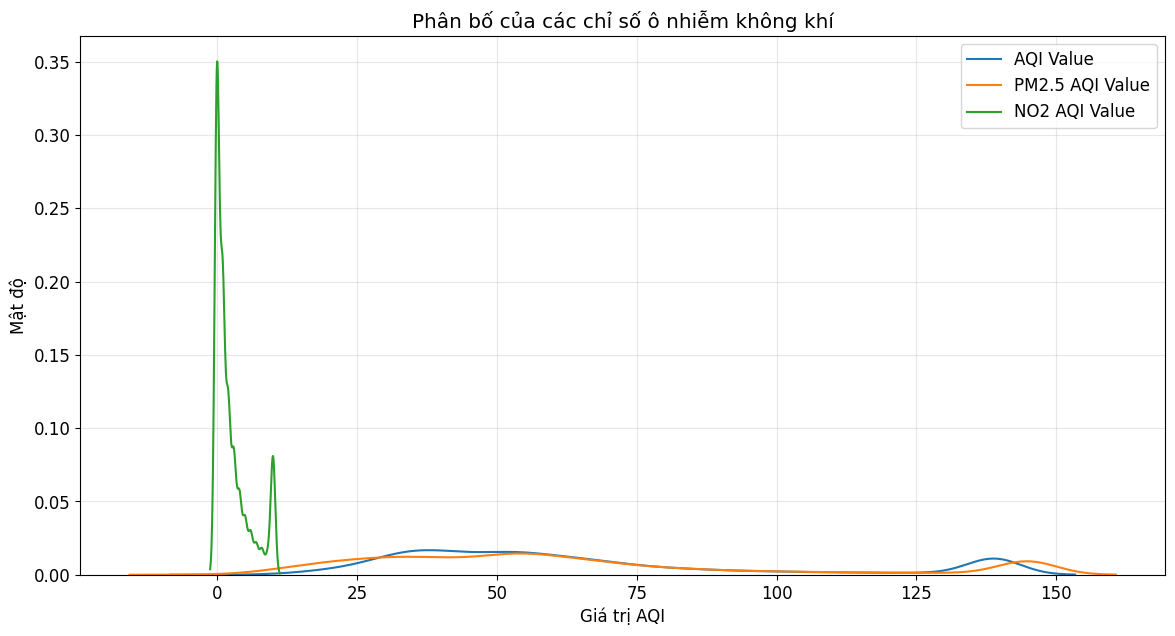

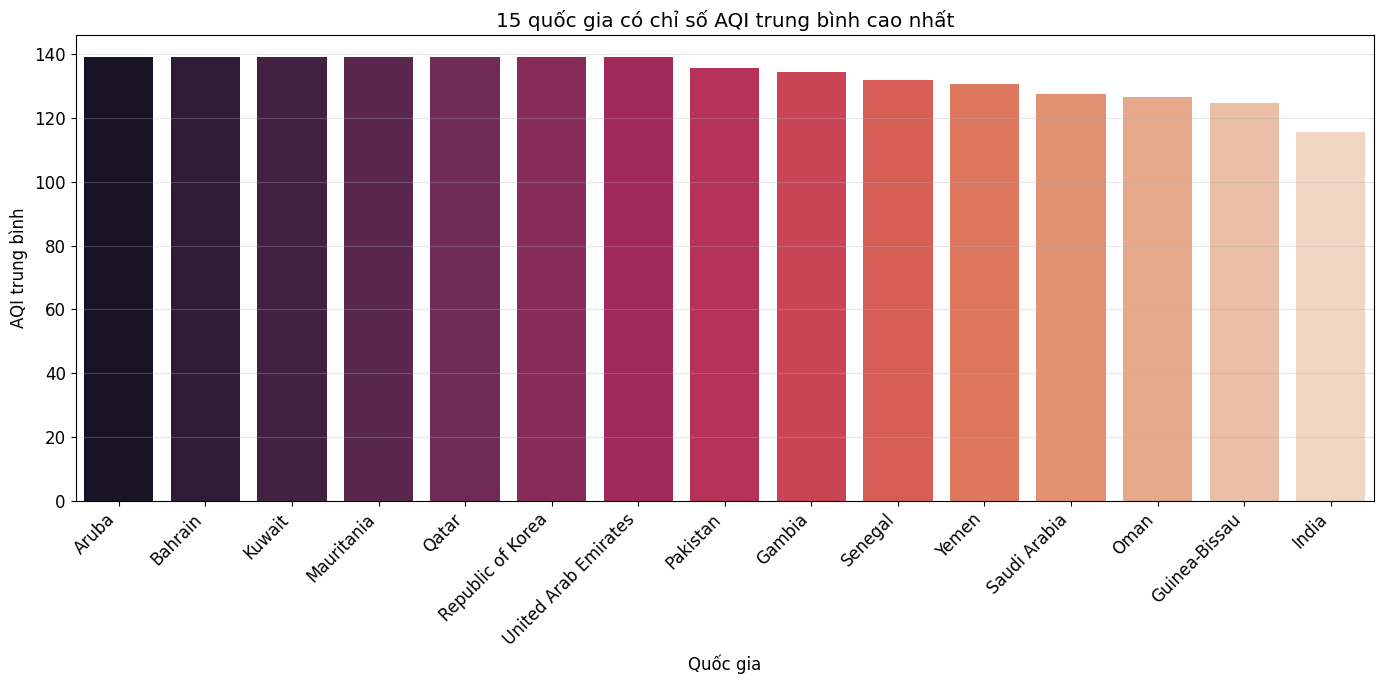

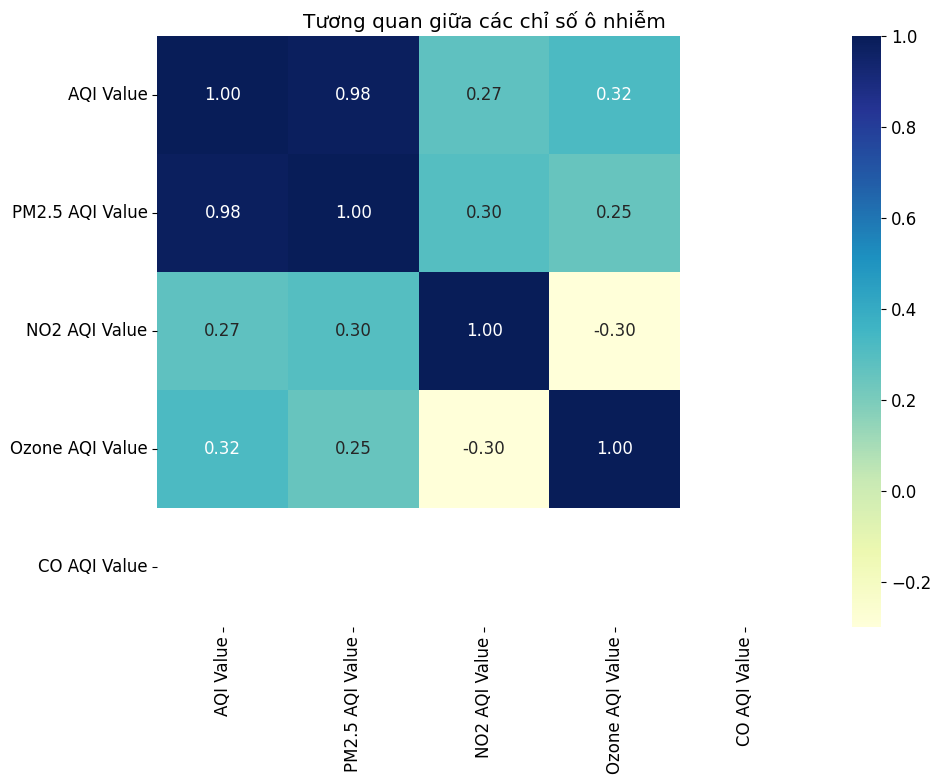

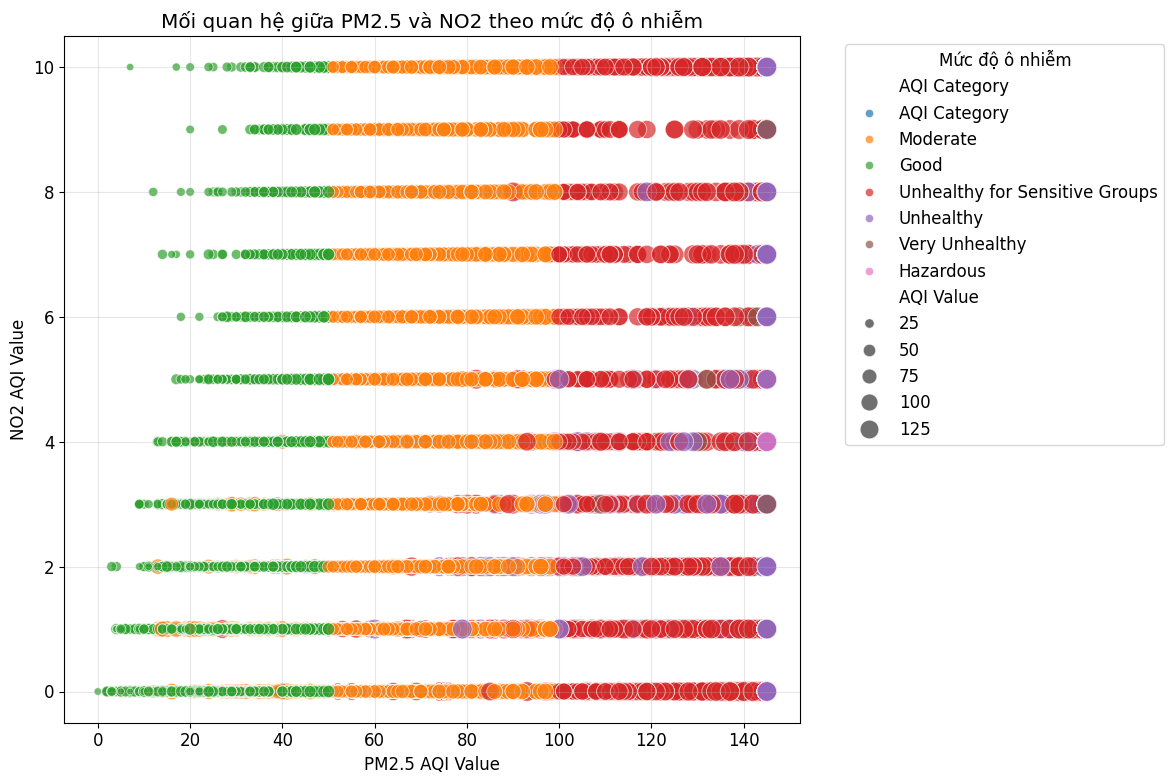

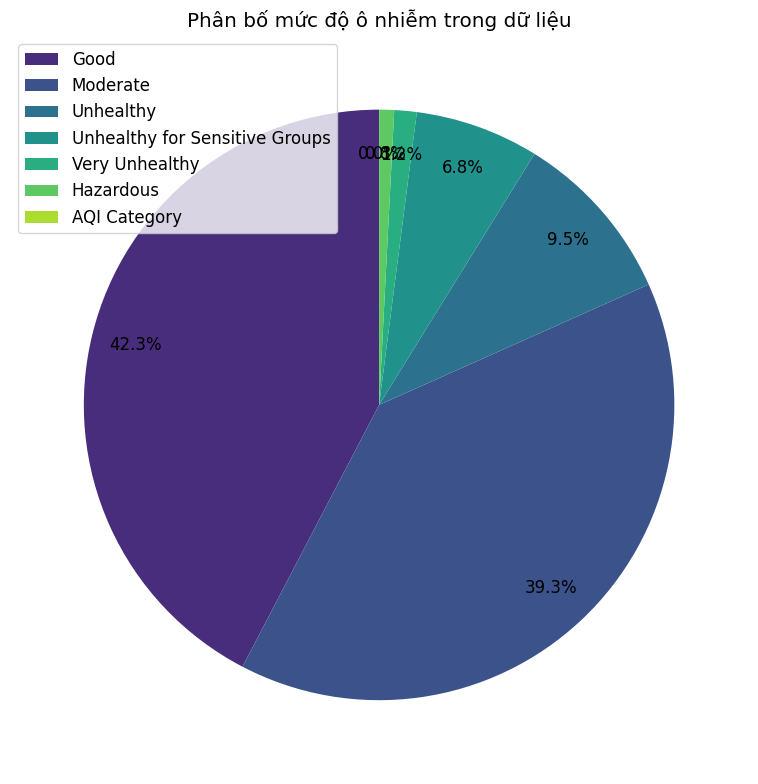

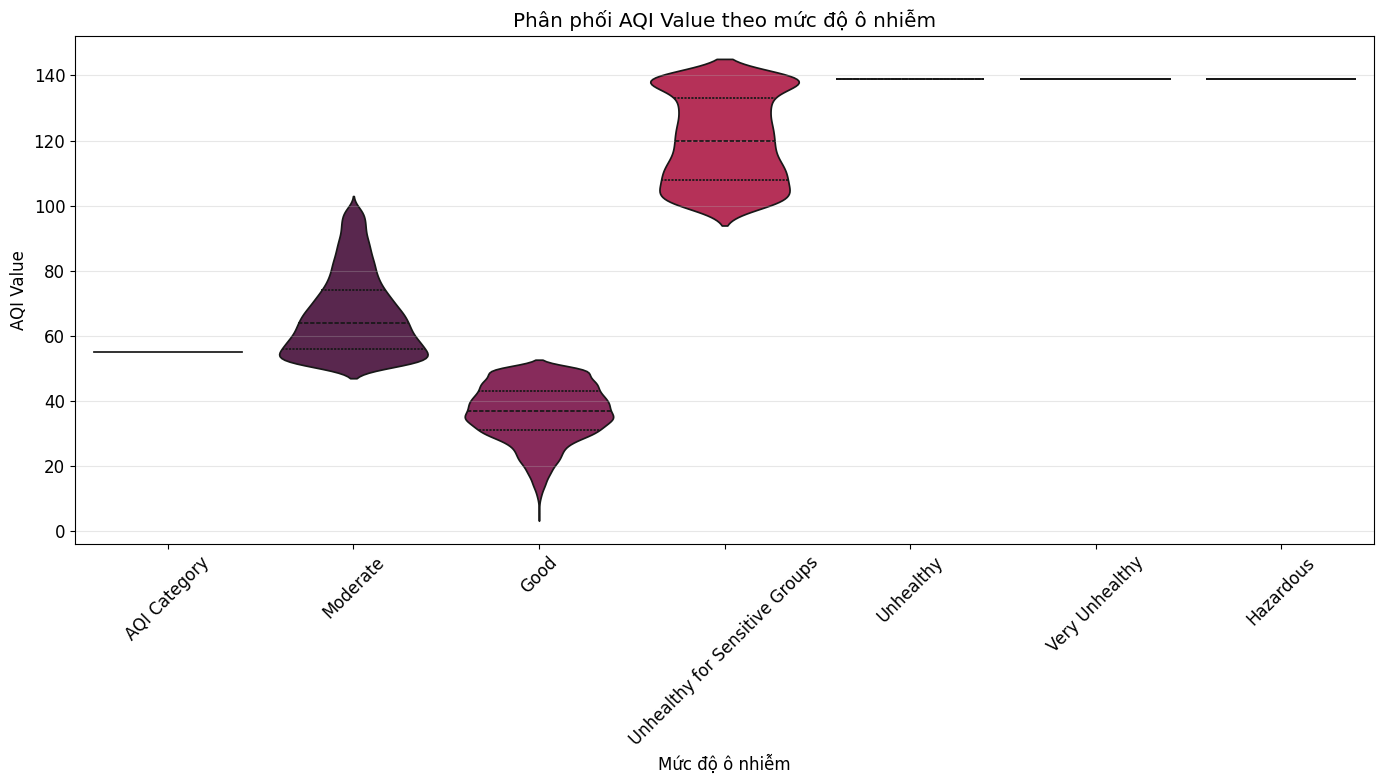

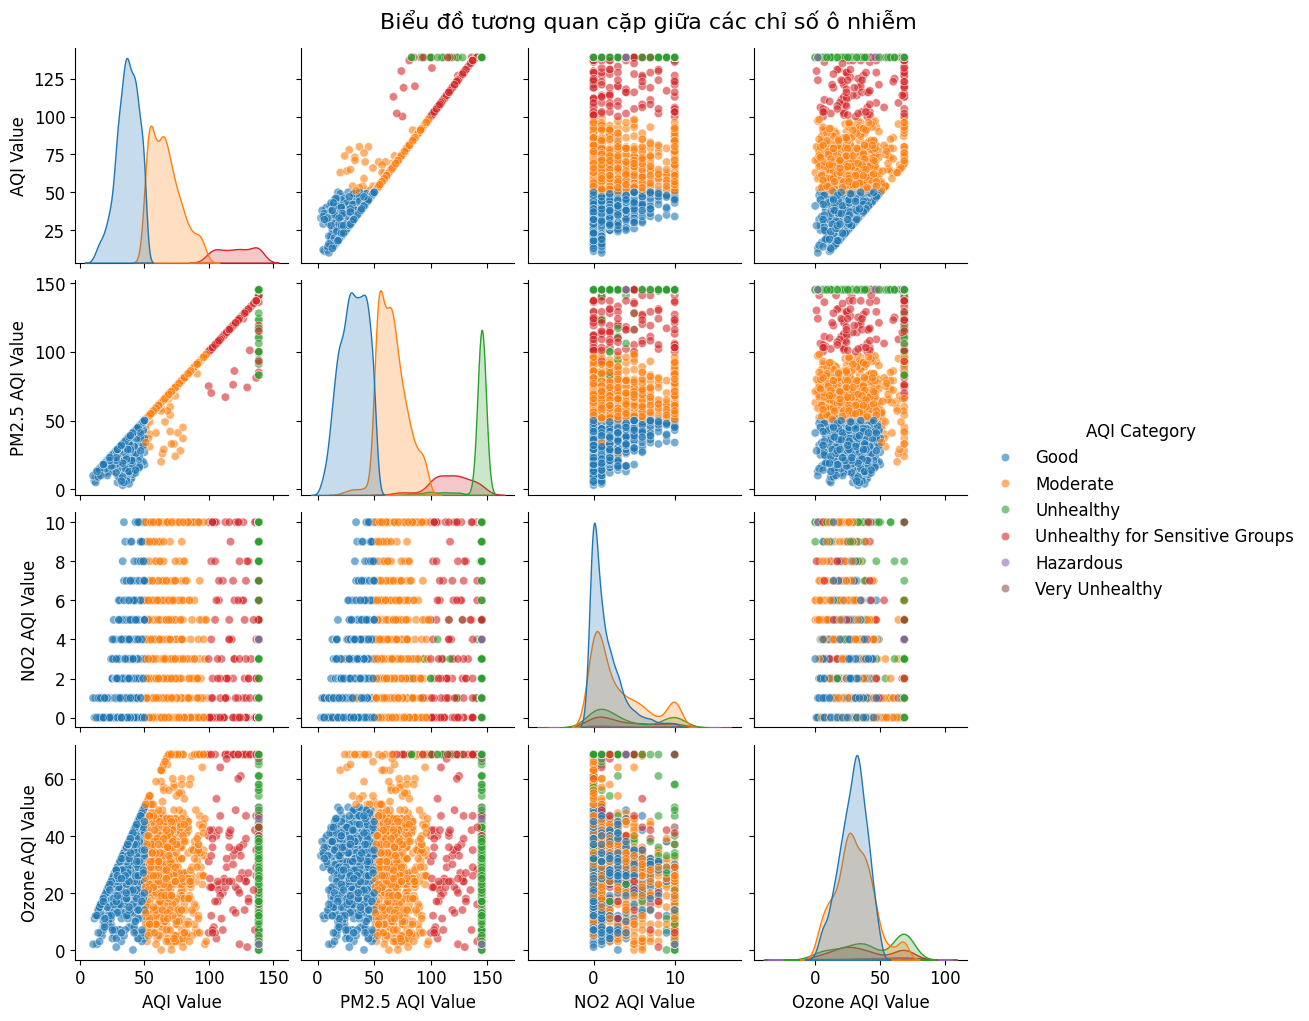

In [16]:
# Đảm bảo không có NaN trong dữ liệu trước khi trực quan hóa
df_viz = df_clean.copy()
for col in numeric_columns:
    df_viz[col] = df_viz[col].fillna(df_viz[col].median())

# 1. Biểu đồ phân bố tổng thể
plt.figure(figsize=(14, 7))
for col in ['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value']:
    sns.kdeplot(df_viz[col], label=col)
plt.title('Phân bố của các chỉ số ô nhiễm không khí')
plt.xlabel('Giá trị AQI')
plt.ylabel('Mật độ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 2. Biểu đồ top 15 quốc gia có AQI cao nhất
top_aqi_countries = df_viz.groupby('Country')['AQI Value'].mean().nlargest(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_aqi_countries.index, y=top_aqi_countries.values, palette='rocket')
plt.title('15 quốc gia có chỉ số AQI trung bình cao nhất')
plt.xlabel('Quốc gia')
plt.ylabel('AQI trung bình')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Bản đồ nhiệt tương quan giữa các chỉ số ô nhiễm
correlation_pollutants = df_viz[['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value', 
                                 'Ozone AQI Value', 'CO AQI Value']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pollutants, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Tương quan giữa các chỉ số ô nhiễm')
plt.tight_layout()
plt.show()

# 4. Biểu đồ phân tán với màu theo AQI Category
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='PM2.5 AQI Value', 
    y='NO2 AQI Value', 
    hue='AQI Category',
    size='AQI Value',
    sizes=(20, 200),
    alpha=0.7,
    data=df_viz
)
plt.title('Mối quan hệ giữa PM2.5 và NO2 theo mức độ ô nhiễm')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('NO2 AQI Value')
plt.legend(title='Mức độ ô nhiễm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Biểu đồ tròn cho phân bố mức độ ô nhiễm
plt.figure(figsize=(10, 8))
df_viz['AQI Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    labels=None,
    pctdistance=0.85,
    colors=sns.color_palette('viridis', n_colors=df_viz['AQI Category'].nunique())
)
plt.title('Phân bố mức độ ô nhiễm trong dữ liệu')
plt.ylabel('')
plt.legend(labels=df_viz['AQI Category'].value_counts().index, loc='best')
plt.tight_layout()
plt.show()

# 6. Biểu đồ violin plot để so sánh phân phối
plt.figure(figsize=(14, 8))
sns.violinplot(x='AQI Category', y='AQI Value', data=df_viz, 
               palette='rocket', inner='quartile', hue='AQI Category', legend=False)
plt.title('Phân phối AQI Value theo mức độ ô nhiễm')
plt.xlabel('Mức độ ô nhiễm')
plt.ylabel('AQI Value')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Lấy mẫu một phần dữ liệu để vẽ biểu đồ cặp (pair plot)
# Lấy mẫu 2000 bản ghi để tránh biểu đồ quá dày đặc
sample_size = min(2000, len(df_viz))
df_sample = df_viz.sample(sample_size, random_state=42)

# Vẽ pair plot
sns.pairplot(df_sample, vars=['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value', 'Ozone AQI Value'], 
             hue='AQI Category', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Biểu đồ tương quan cặp giữa các chỉ số ô nhiễm', y=1.02, fontsize=16)
plt.show()

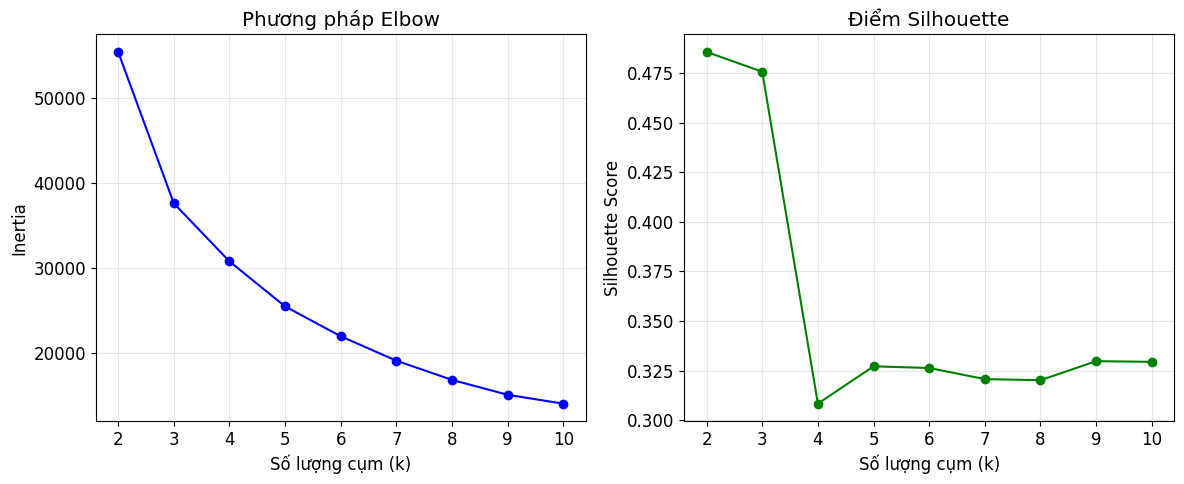

Phân tích các cụm:
           AQI Mean  AQI Median  Count  PM2.5 Mean  NO2 Mean  Ozone Mean  \
Cluster                                                                    
0         85.613141        76.0   3668   86.573610  8.328790   17.180752   
1         38.871882        37.0   9702   35.420326  1.344259   24.312101   
2         61.890609        60.0   6911   58.300680  1.207351   40.791709   
3        133.385485       139.0   3183  135.156456  1.920201   51.045240   

         CO Mean Most Common Category  \
Cluster                                 
0            1.0             Moderate   
1            1.0                 Good   
2            1.0             Moderate   
3            1.0            Unhealthy   

                                    Top 3 Countries  
Cluster                                              
0        [United States of America, Mexico, Brazil]  
1             [Brazil, Russian Federation, Germany]  
2        [United States of America, Italy, Germany]  
3      

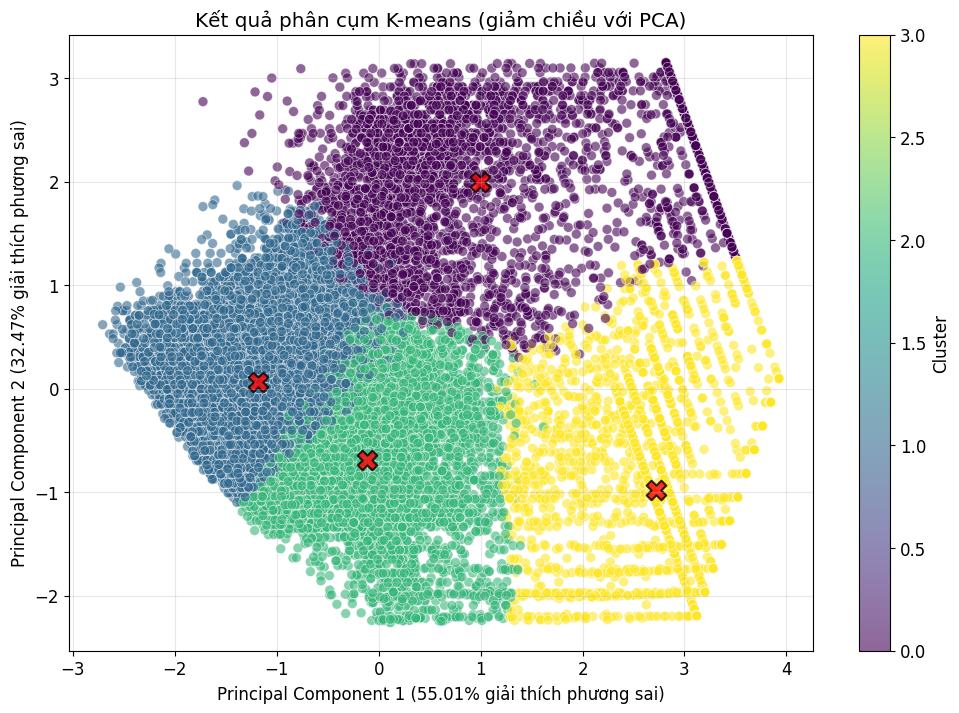


Độ chính xác (Accuracy) của mô hình Random Forest: 0.9688

Báo cáo phân loại chi tiết:
                                precision    recall  f1-score   support

                  AQI Category       0.00      0.00      0.00         1
                          Good       1.00      1.00      1.00      3001
                     Hazardous       0.19      0.05      0.08        63
                      Moderate       1.00      1.00      1.00      2761
                     Unhealthy       0.79      0.95      0.86       674
Unhealthy for Sensitive Groups       0.96      0.90      0.93       460
                Very Unhealthy       0.15      0.04      0.06        80

                      accuracy                           0.97      7040
                     macro avg       0.58      0.56      0.56      7040
                  weighted avg       0.96      0.97      0.96      7040



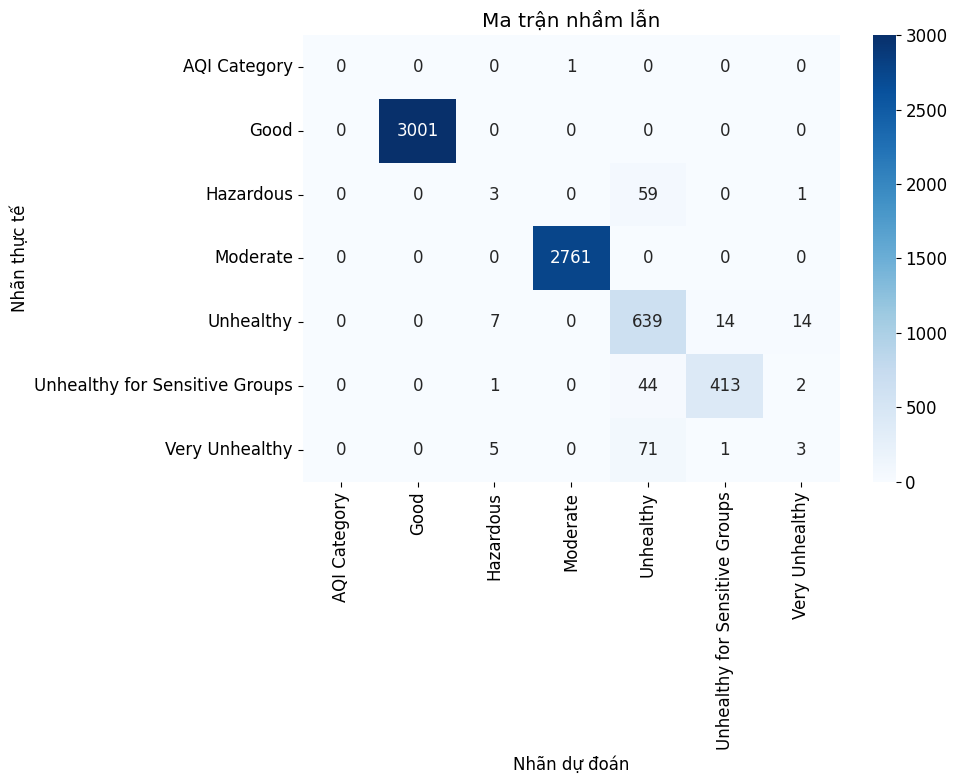

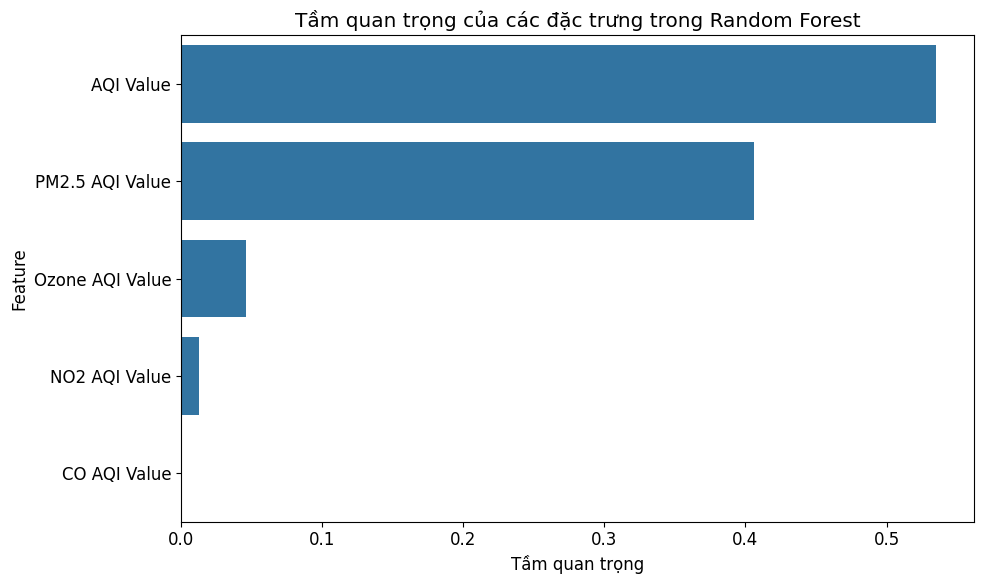

In [17]:
# Phương pháp 1: Phân cụm K-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Chuẩn bị dữ liệu cho phân cụm
# Sử dụng các thuộc tính số đã được chuẩn hóa
cluster_features = ['AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value', 
                    'Ozone AQI Value', 'CO AQI Value']

# Đảm bảo không có NaN trong dữ liệu
df_cluster = df_clean.copy()
for col in cluster_features:
    df_cluster[col] = df_cluster[col].fillna(df_cluster[col].median())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster[cluster_features])

# Xác định số lượng cụm tối ưu bằng phương pháp Elbow
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)
    
    # Tính điểm silhouette nếu k >= 2
    if k >= 2:
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_cluster, labels))

# Vẽ biểu đồ Elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', color='blue')
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range[0:], silhouette_scores, 'o-', color='green')
plt.title('Điểm Silhouette')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Chọn số lượng cụm tối ưu (giả sử k=4 dựa trên kết quả)
optimal_k = 4  # Thay đổi dựa trên kết quả biểu đồ Elbow và Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

# Thêm nhãn cụm vào DataFrame
df_cluster['Cluster'] = cluster_labels

# Phân tích các cụm
cluster_analysis = df_cluster.groupby('Cluster').agg({
    'AQI Value': ['mean', 'median', 'count'],
    'PM2.5 AQI Value': 'mean',
    'NO2 AQI Value': 'mean',
    'Ozone AQI Value': 'mean',
    'CO AQI Value': 'mean',
    'AQI Category': lambda x: x.value_counts().index[0],
    'Country': lambda x: pd.Series(x).value_counts().nlargest(3).index.tolist()
})

# Đổi tên cột cho dễ đọc
cluster_analysis.columns = [
    'AQI Mean', 'AQI Median', 'Count', 'PM2.5 Mean', 'NO2 Mean', 
    'Ozone Mean', 'CO Mean', 'Most Common Category', 'Top 3 Countries'
]

print("Phân tích các cụm:")
print(cluster_analysis)

# Trực quan hóa kết quả phân cụm bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', 
                     alpha=0.6, s=50, edgecolors='w', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')

# Thêm tâm cụm
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.8, 
           marker='X', edgecolors='black', linewidth=1.5)

plt.title('Kết quả phân cụm K-means (giảm chiều với PCA)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} giải thích phương sai)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} giải thích phương sai)')
plt.grid(True, alpha=0.3)
plt.show()

# Phương pháp 2: Phân lớp với Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Chuẩn bị dữ liệu cho phân lớp
# Mục tiêu: Dự đoán AQI Category
# Sử dụng các thuộc tính số làm đặc trưng
X = df_cluster[cluster_features]
y = df_cluster['AQI Category']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Xây dựng mô hình Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_classifier.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy) của mô hình Random Forest: {accuracy:.4f}")

# Báo cáo phân loại chi tiết
print("\nBáo cáo phân loại chi tiết:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Ma trận nhầm lẫn')
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')
plt.tight_layout()
plt.show()

# Tầm quan trọng của các đặc trưng
feature_importance = pd.DataFrame({
    'Feature': cluster_features,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Tầm quan trọng của các đặc trưng trong Random Forest')
plt.xlabel('Tầm quan trọng')
plt.tight_layout()
plt.show()

Silhouette Score: 0.3084
Normalized Mutual Information (NMI): 0.4053
Adjusted Rand Index (ARI): 0.3799
Cụm 0:
  - Số lượng mẫu: 3668
  - Phân loại chính: Moderate (2253 mẫu, 61.42%)
  - Phân bố AQI Category:
     + Moderate: 61.42%
     + Unhealthy for Sensitive Groups: 15.08%
     + Unhealthy: 12.87%
     + Good: 8.34%
     + Very Unhealthy: 1.85%
     + Hazardous: 0.44%

Cụm 1:
  - Số lượng mẫu: 9702
  - Phân loại chính: Good (7851 mẫu, 80.92%)
  - Phân bố AQI Category:
     + Good: 80.92%
     + Moderate: 19.08%

Cụm 2:
  - Số lượng mẫu: 6911
  - Phân loại chính: Moderate (5050 mẫu, 73.07%)
  - Phân bố AQI Category:
     + Moderate: 73.07%
     + Good: 25.74%
     + Unhealthy for Sensitive Groups: 1.17%
     + AQI Category: 0.01%

Cụm 3:
  - Số lượng mẫu: 3183
  - Phân loại chính: Unhealthy (1755 mẫu, 55.14%)
  - Phân bố AQI Category:
     + Unhealthy: 55.14%
     + Unhealthy for Sensitive Groups: 30.07%
     + Very Unhealthy: 6.88%
     + Hazardous: 5.50%
     + Moderate: 2.42%

Độ

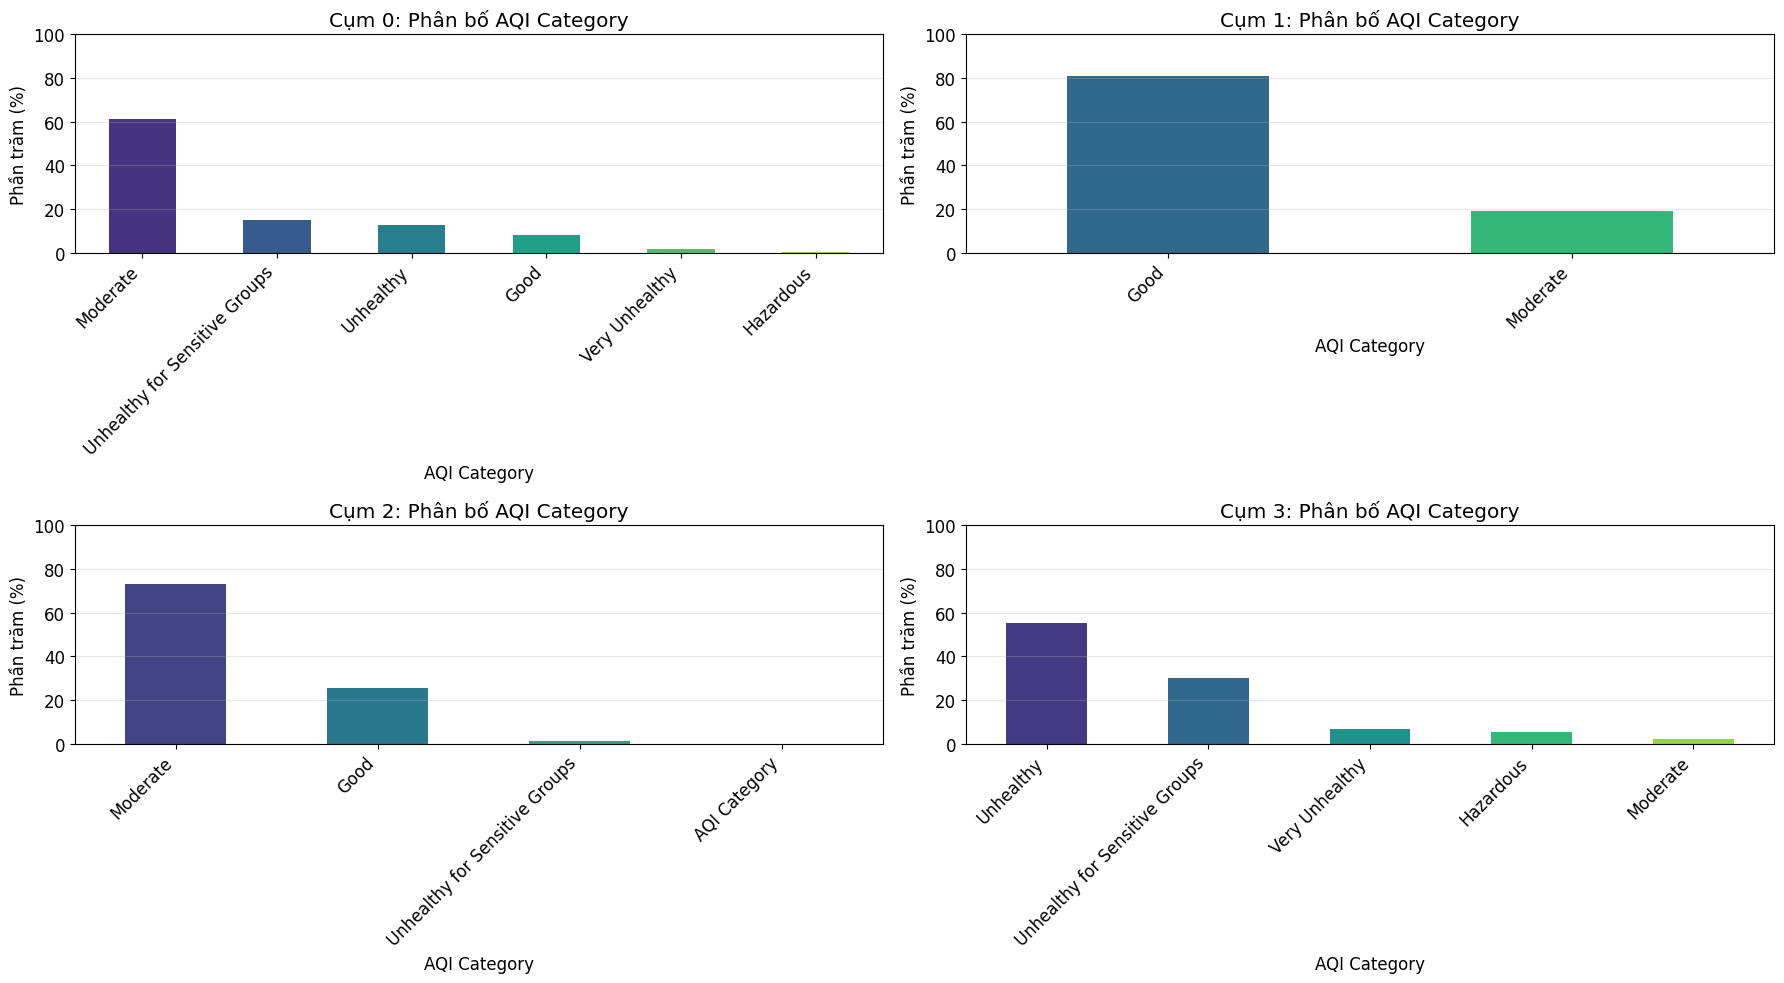


Độ chính xác trung bình qua 5-fold cross-validation: 0.9711
Độ lệch chuẩn: 0.0009
Kết quả từng fold: [0.97102067 0.97272534 0.97102067 0.97038142 0.97037511]

Các lớp trong dữ liệu huấn luyện: ['Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']
Các lớp trong dữ liệu kiểm tra: ['AQI Category', 'Good', 'Hazardous', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy']
Các lớp trong mô hình: ['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']


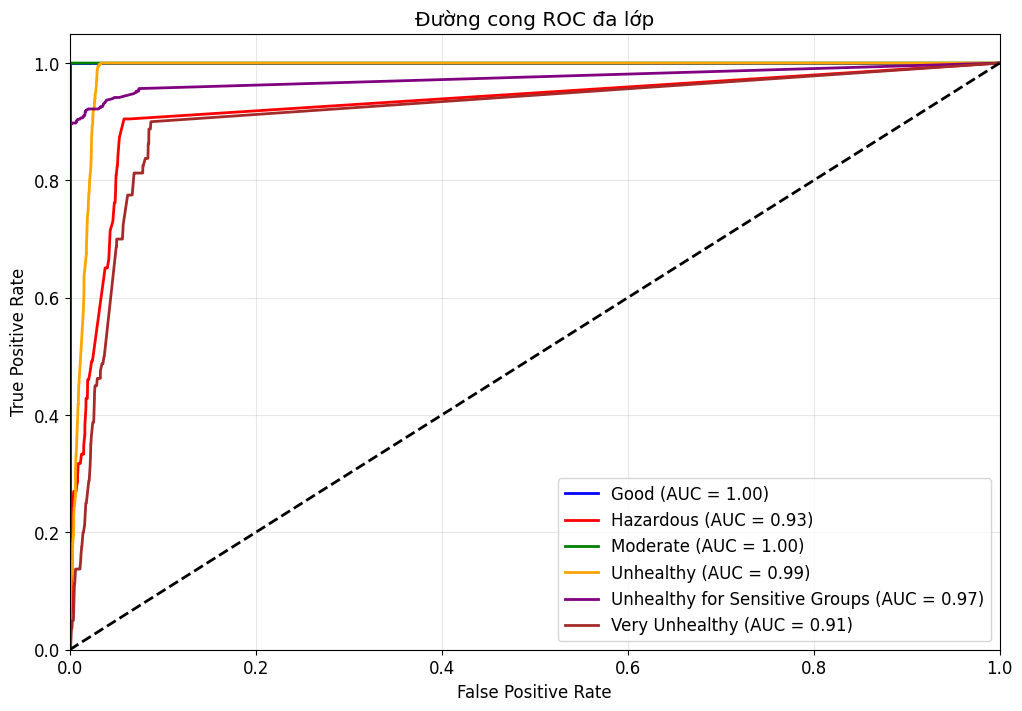


Đánh giá mô hình: Random Forest
Độ chính xác: 0.9688
Báo cáo phân loại:
                                precision    recall  f1-score   support

                  AQI Category       0.00      0.00      0.00         1
                          Good       1.00      1.00      1.00      3001
                     Hazardous       0.19      0.05      0.08        63
                      Moderate       1.00      1.00      1.00      2761
                     Unhealthy       0.79      0.95      0.86       674
Unhealthy for Sensitive Groups       0.96      0.90      0.93       460
                Very Unhealthy       0.15      0.04      0.06        80

                      accuracy                           0.97      7040
                     macro avg       0.58      0.56      0.56      7040
                  weighted avg       0.96      0.97      0.96      7040


Đánh giá mô hình: Decision Tree
Độ chính xác: 0.9680
Báo cáo phân loại:
                                precision    recall  f1-sco

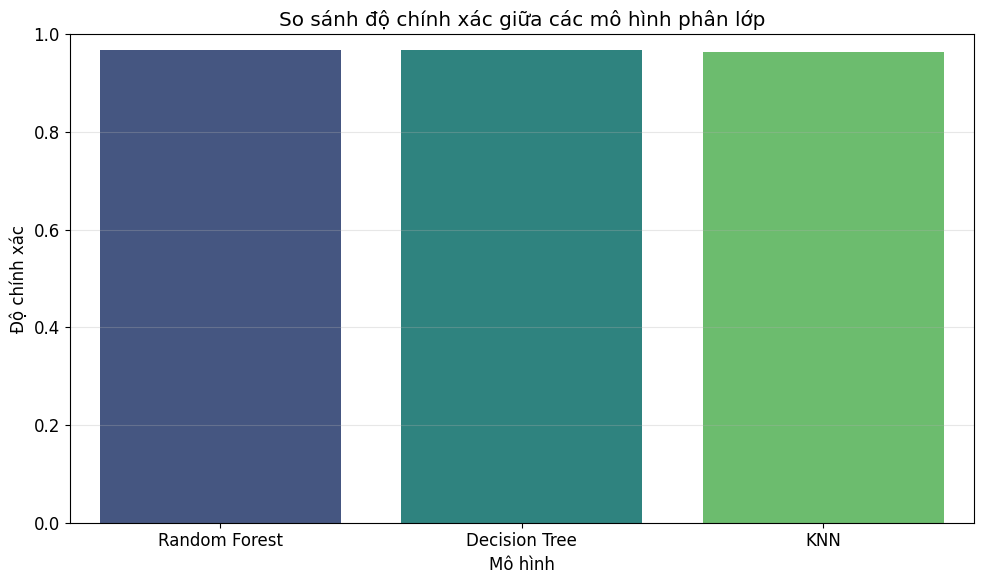

In [19]:
# 1. Đánh giá phân cụm

# 1.1 Phương pháp không giám sát: Silhouette Score
silhouette_avg = silhouette_score(X_cluster, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 1.2 Phương pháp giám sát: Đánh giá độ thuần khiết của cụm dựa vào AQI Category
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

# Chuyển đổi AQI Category thành số để đánh giá
le = LabelEncoder()
aqi_category_encoded = le.fit_transform(df_cluster['AQI Category'])

# Tính các chỉ số đánh giá
nmi = normalized_mutual_info_score(aqi_category_encoded, cluster_labels)
ari = adjusted_rand_score(aqi_category_encoded, cluster_labels)

print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Tính độ thuần khiết của từng cụm
purity_scores = []
for cluster_id in range(optimal_k):
    cluster_items = df_cluster[df_cluster['Cluster'] == cluster_id]
    majority_category = cluster_items['AQI Category'].value_counts().idxmax()
    majority_count = cluster_items[cluster_items['AQI Category'] == majority_category].shape[0]
    purity = majority_count / cluster_items.shape[0]
    purity_scores.append(purity)
    
    print(f"Cụm {cluster_id}:")
    print(f"  - Số lượng mẫu: {cluster_items.shape[0]}")
    print(f"  - Phân loại chính: {majority_category} ({majority_count} mẫu, {purity:.2%})")
    print(f"  - Phân bố AQI Category:")
    category_dist = cluster_items['AQI Category'].value_counts(normalize=True) * 100
    for cat, pct in category_dist.items():
        print(f"     + {cat}: {pct:.2f}%")
    print()

avg_purity = sum(purity_scores) / len(purity_scores)
print(f"Độ thuần khiết trung bình của các cụm: {avg_purity:.4f}")

# Hiển thị phân bố AQI Category trong mỗi cụm
plt.figure(figsize=(18, 10))
for i in range(optimal_k):
    plt.subplot(2, 2, i+1)
    cluster_data = df_cluster[df_cluster['Cluster'] == i]['AQI Category'].value_counts(normalize=True) * 100
    cluster_data.plot(kind='bar', color=sns.color_palette('viridis', len(cluster_data)))
    plt.title(f'Cụm {i}: Phân bố AQI Category')
    plt.ylabel('Phần trăm (%)')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Đánh giá phân lớp

# 2.1 Phương pháp 1: Cross-Validation
from sklearn.model_selection import cross_val_score

# Thực hiện 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f"\nĐộ chính xác trung bình qua 5-fold cross-validation: {cv_scores.mean():.4f}")
print(f"Độ lệch chuẩn: {cv_scores.std():.4f}")
print(f"Kết quả từng fold: {cv_scores}")

# 2.2 Phương pháp 2: Đường cong ROC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Kiểm tra và hiển thị các lớp
print("\nCác lớp trong dữ liệu huấn luyện:", sorted(y_train.unique()))
print("Các lớp trong dữ liệu kiểm tra:", sorted(y_test.unique()))
print("Các lớp trong mô hình:", rf_classifier.classes_)

# Sử dụng đúng các lớp từ mô hình
model_classes = rf_classifier.classes_

try:
    # Binarize nhãn cho đa lớp sử dụng class từ mô hình
    y_bin = label_binarize(y_test, classes=model_classes)
    n_classes = len(model_classes)
    
    # Dự đoán xác suất
    y_score = rf_classifier.predict_proba(X_test)
    
    # Vẽ đường cong ROC cho từng lớp
    plt.figure(figsize=(12, 8))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown'])
    lw = 2
    
    for i, (color, cls) in enumerate(zip(colors, model_classes)):
        if i < len(model_classes):  # Đảm bảo index không vượt quá
            fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, lw=lw,
                     label=f'{cls} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Đường cong ROC đa lớp')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print(f"Lỗi khi vẽ đường cong ROC: {e}")
    print("Thử cách khác để đánh giá:")
    
    # Một cách tiếp cận khác
    from sklearn.metrics import precision_recall_curve, average_precision_score
    
    # Tạo curve precision-recall cho mỗi lớp
    plt.figure(figsize=(12, 8))
    
    for i, cls in enumerate(model_classes):
        if i < y_score.shape[1]:  # Đảm bảo index không vượt quá
            y_true_binary = (y_test == cls).astype(int)
            y_score_binary = y_score[:, i]
            
            precision, recall, _ = precision_recall_curve(y_true_binary, y_score_binary)
            ap = average_precision_score(y_true_binary, y_score_binary)
            
            plt.plot(recall, precision, lw=2,
                     label=f'{cls} (AP = {ap:.2f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve cho mỗi lớp')
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()

# 3. So sánh với phương pháp phân lớp khác
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Thử thêm SVM nếu kích thước dữ liệu cho phép
if len(X_train) < 10000:  # SVM chậm với dữ liệu lớn
    models['SVM'] = SVC(probability=True, random_state=42)

# Huấn luyện và đánh giá từng mô hình
results = {}
for name, model in models.items():
    print(f"\nĐánh giá mô hình: {name}")
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Độ chính xác: {accuracy:.4f}")
    print("Báo cáo phân loại:")
    print(classification_report(y_test, y_pred))

# Vẽ biểu đồ so sánh độ chính xác
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracy_values = list(results.values())

sns.barplot(x=models_names, y=accuracy_values, palette='viridis')
plt.title('So sánh độ chính xác giữa các mô hình phân lớp')
plt.xlabel('Mô hình')
plt.ylabel('Độ chính xác')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()